In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import holidays
import random

# Load your CSV file
csv_file_path = 'Coffee_Stores_Data.csv'
df = pd.read_csv(csv_file_path)

In [ ]:
# Filter the store ids
selected_store_ids = [18, 117, 332]
df = df[df['StoreID'].isin(selected_store_ids)]

# Add ZipCode
zipcode_map = {18: '91101', 117: '91105', 332: '92122'}
df['Zipcode'] = df['StoreID'].map(zipcode_map)

# Add Address
address_map = {
    18: 'Pasadena, CA 91101',
    117: 'Pasadena, CA 91105',
    332: 'San Diego, CA 92122'
}
df['Address'] = df['StoreID'].map(address_map)

# Converting to Datetime object
df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])
df['Year'] = pd.to_datetime(df['BusinessDate']).dt.year
df['Month'] = pd.to_datetime(df['BusinessDate']).dt.month

# Add Weekday
def is_weekday(date):
    return 1 if date.weekday() < 5 else 0

df['Weekday'] = df['BusinessDate'].apply(is_weekday)

# Add National Holiday
def is_us_national_holiday(date):
    us_holidays = holidays.UnitedStates(years=date.year)
    return 1 if date in us_holidays else 0

df['Holiday'] = df['BusinessDate'].apply(is_us_national_holiday)

weather_data = {
    '2019': {
        'temperature': [35.55, 36.18, 46.08, 50.88, 60.91, 70.29, 75.65, 74.71, 65.91, 54.28, 46.31, 35.71],
        'humidity': [11.8, 1.1, 28.6, 7.6, 74.8, 18.2, 45.5, 5.4, 12.4, 0.8, 11.6, 12.0],
        'precipitation': [1.18, 0.11, 2.86, 0.76, 7.48, 1.82, 4.55, 0.54, 1.24, 0.08, 1.16, 1.20],
        'weather': ['sunny', 'sunny', 'cloudy', 'sunny', 'stormy', 'sunny', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny']
    },
    '2020': {
        'temperature': [57.9, 54.0, 61.1, 65.2, 63.3, 69.3, 74.4, 75.5, 76.6, 72.2, 64.9, 59.4],
        'humidity': [11.1, 11.1, 32.0, 9.3, 65.2, 17.7, 59.8, 2.8, 5.6, 11.1, 11.3, 15.4],
        'precipitation': [1.11, 1.11, 3.20, 0.93, 6.52, 1.77, 5.98, 0.28, 0.56, 1.11, 1.13, 1.54],
        'weather': ['sunny', 'sunny', 'rainy', 'sunny', 'stormy', 'sunny', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny']
    }
}

# Add Weather
df['Weather'] = df.apply(lambda row: weather_data.get(str(row['Year']), {}).get('weather', [])[row['Month'] - 1], axis=1)

# Add Temperature
df['Temperature'] = df.apply(lambda row: weather_data.get(str(row['Year']), {}).get('temperature', [])[row['Month'] - 1], axis=1)

# Add Humidity
df['Humidity'] = df.apply(lambda row: weather_data.get(str(row['Year']), {}).get('humidity', [])[row['Month'] - 1], axis=1)

# Add Precipitation
df['Precipitation'] = df.apply(lambda row: weather_data.get(str(row['Year']), {}).get('precipitation', [])[row['Month'] - 1], axis=1)

# Add DriveThrough
df['DriveThrough'] = [False] * len(df)
df.loc[df['StoreID'].isin([18, 117]), 'DriveThrough'] = False
df.loc[df['StoreID'] == 332, 'DriveThrough'] = True
df.loc[(df['StoreID'] != 18) & (df['StoreID'] != 117) & (df['StoreID'] != 332), 'DriveThrough'] = [random.choice([True, False]) for _ in range(len(df))]

df = df.dropna()

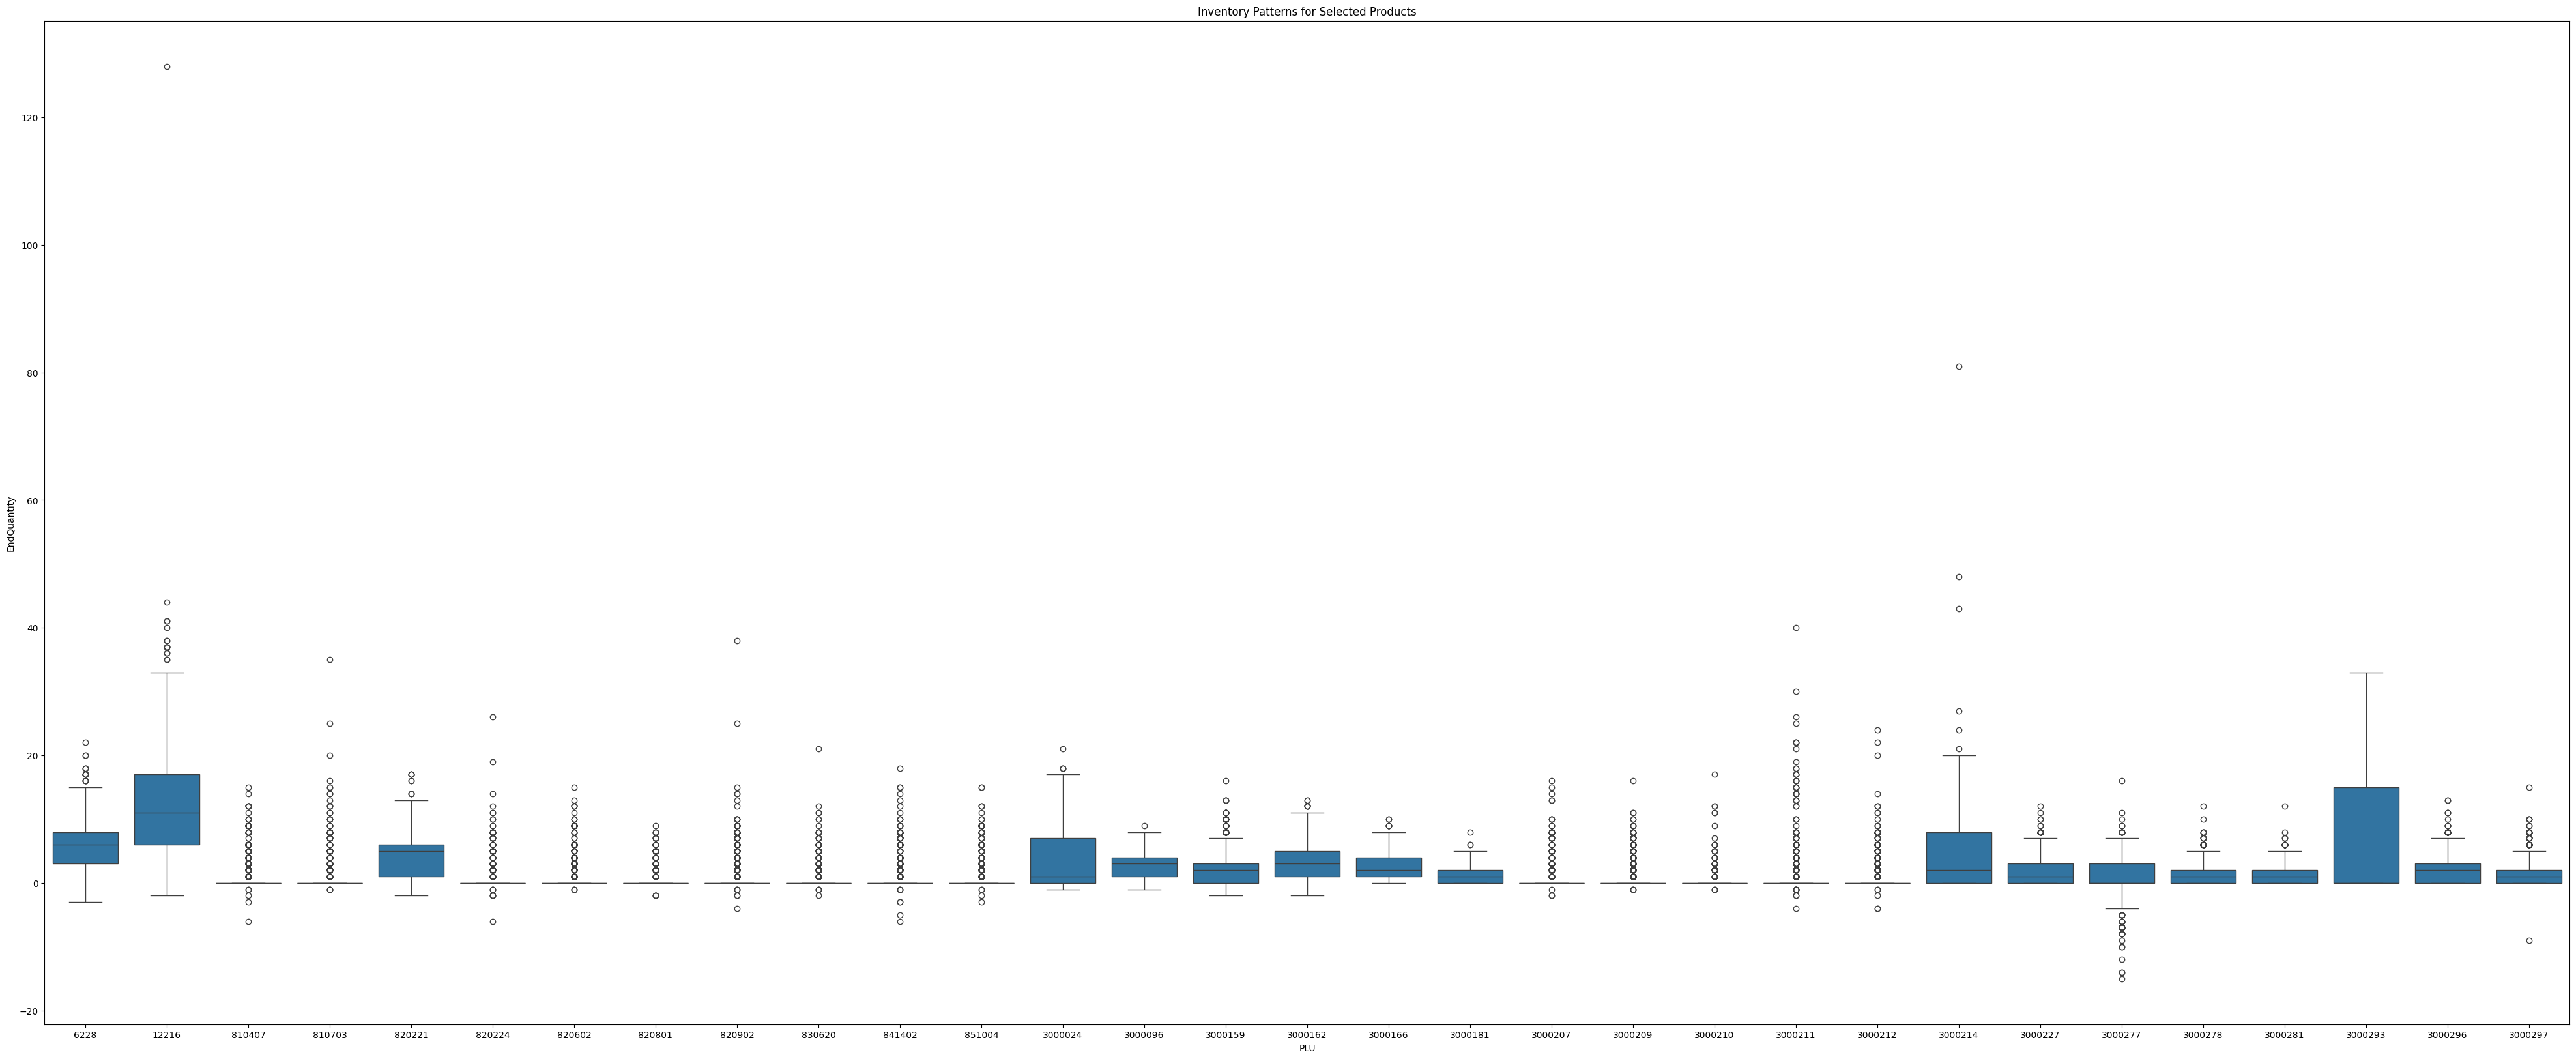

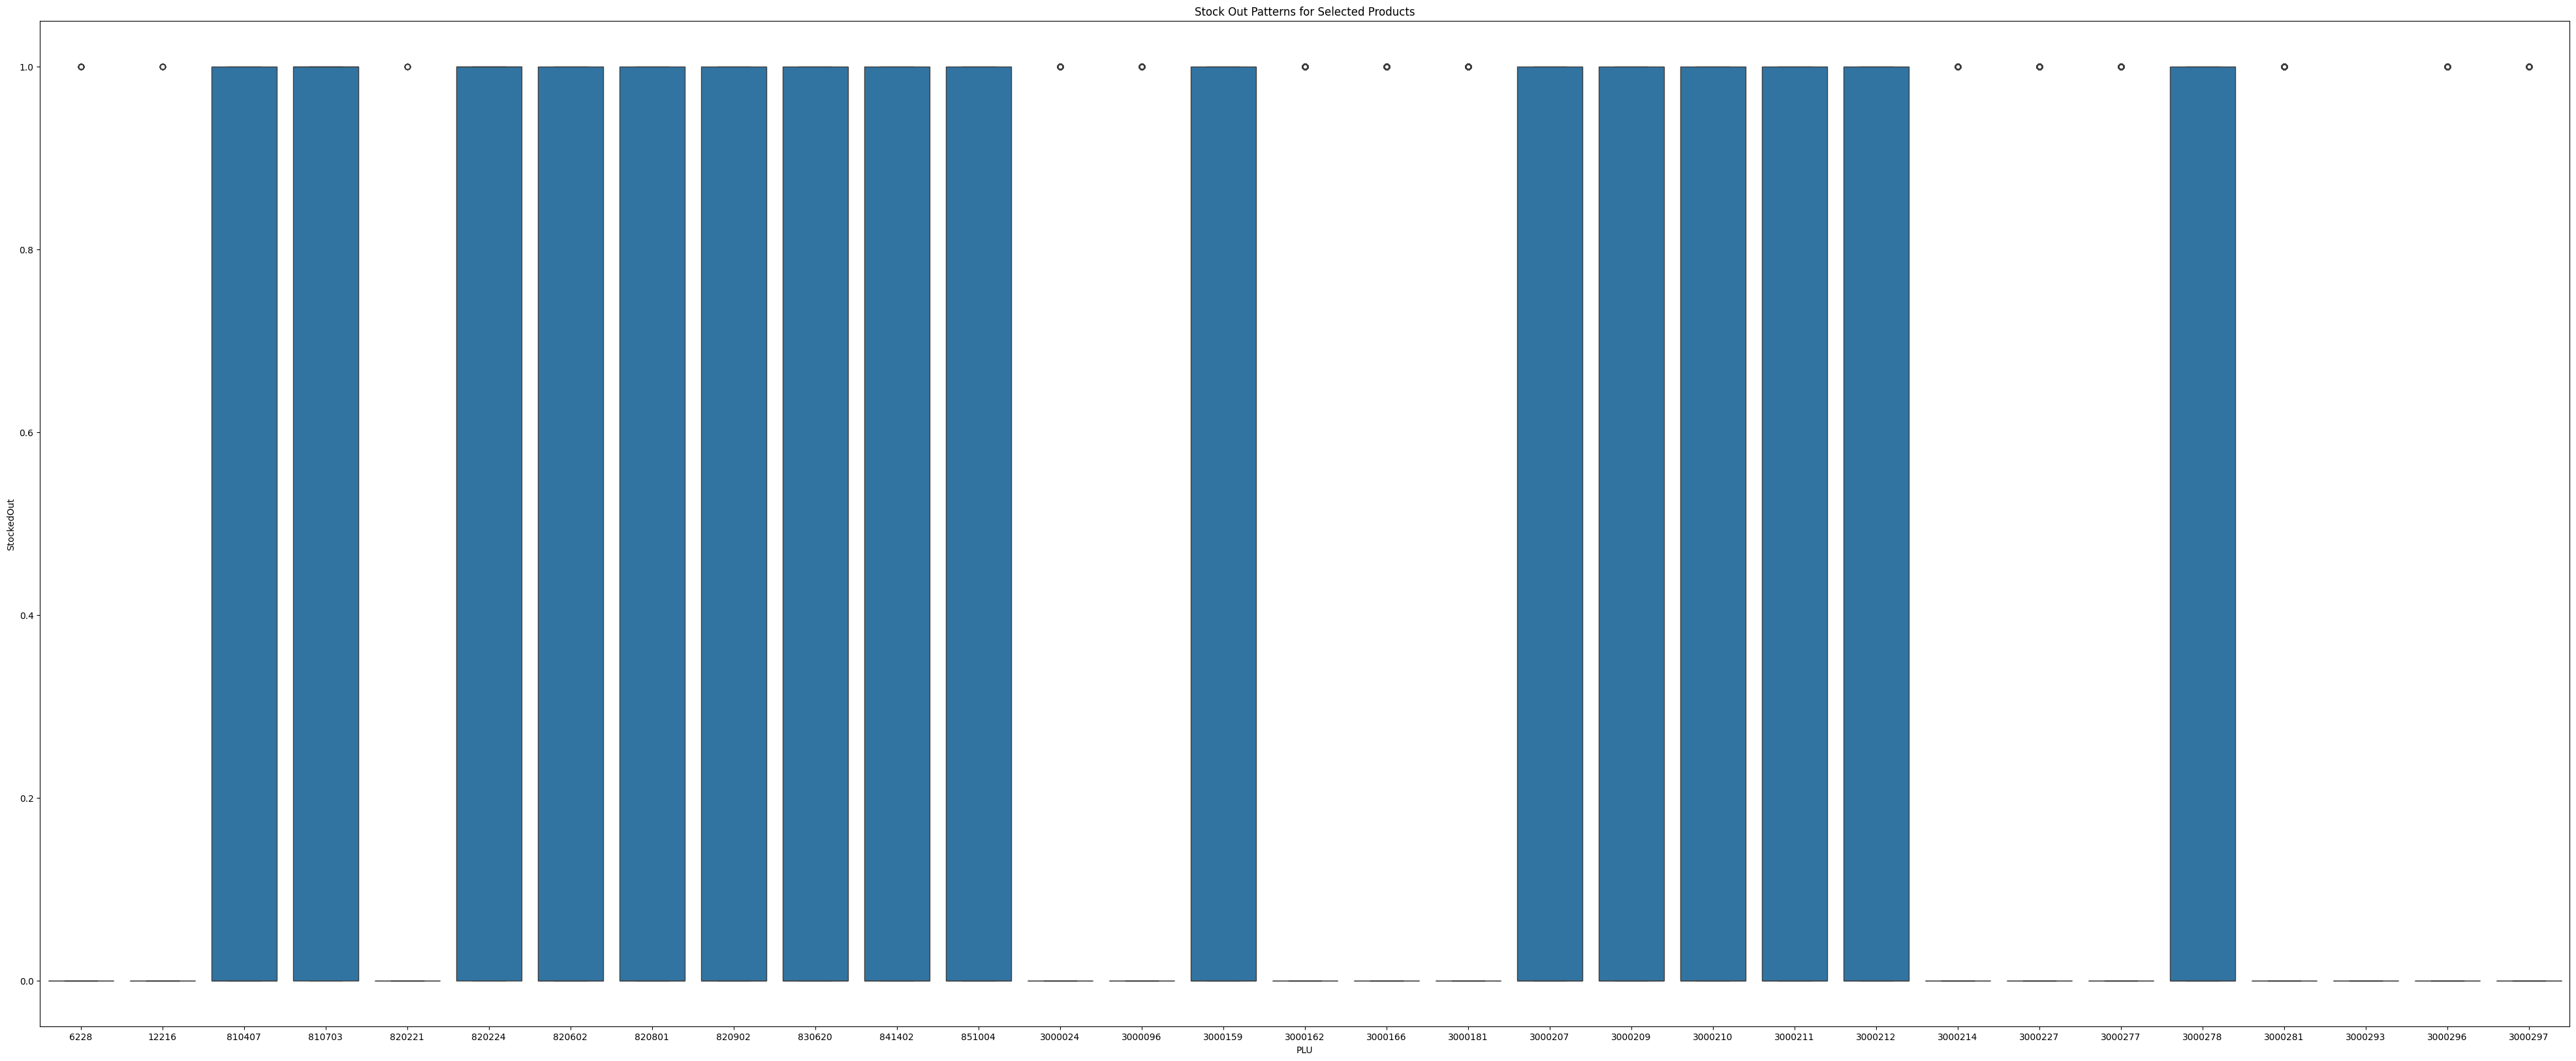

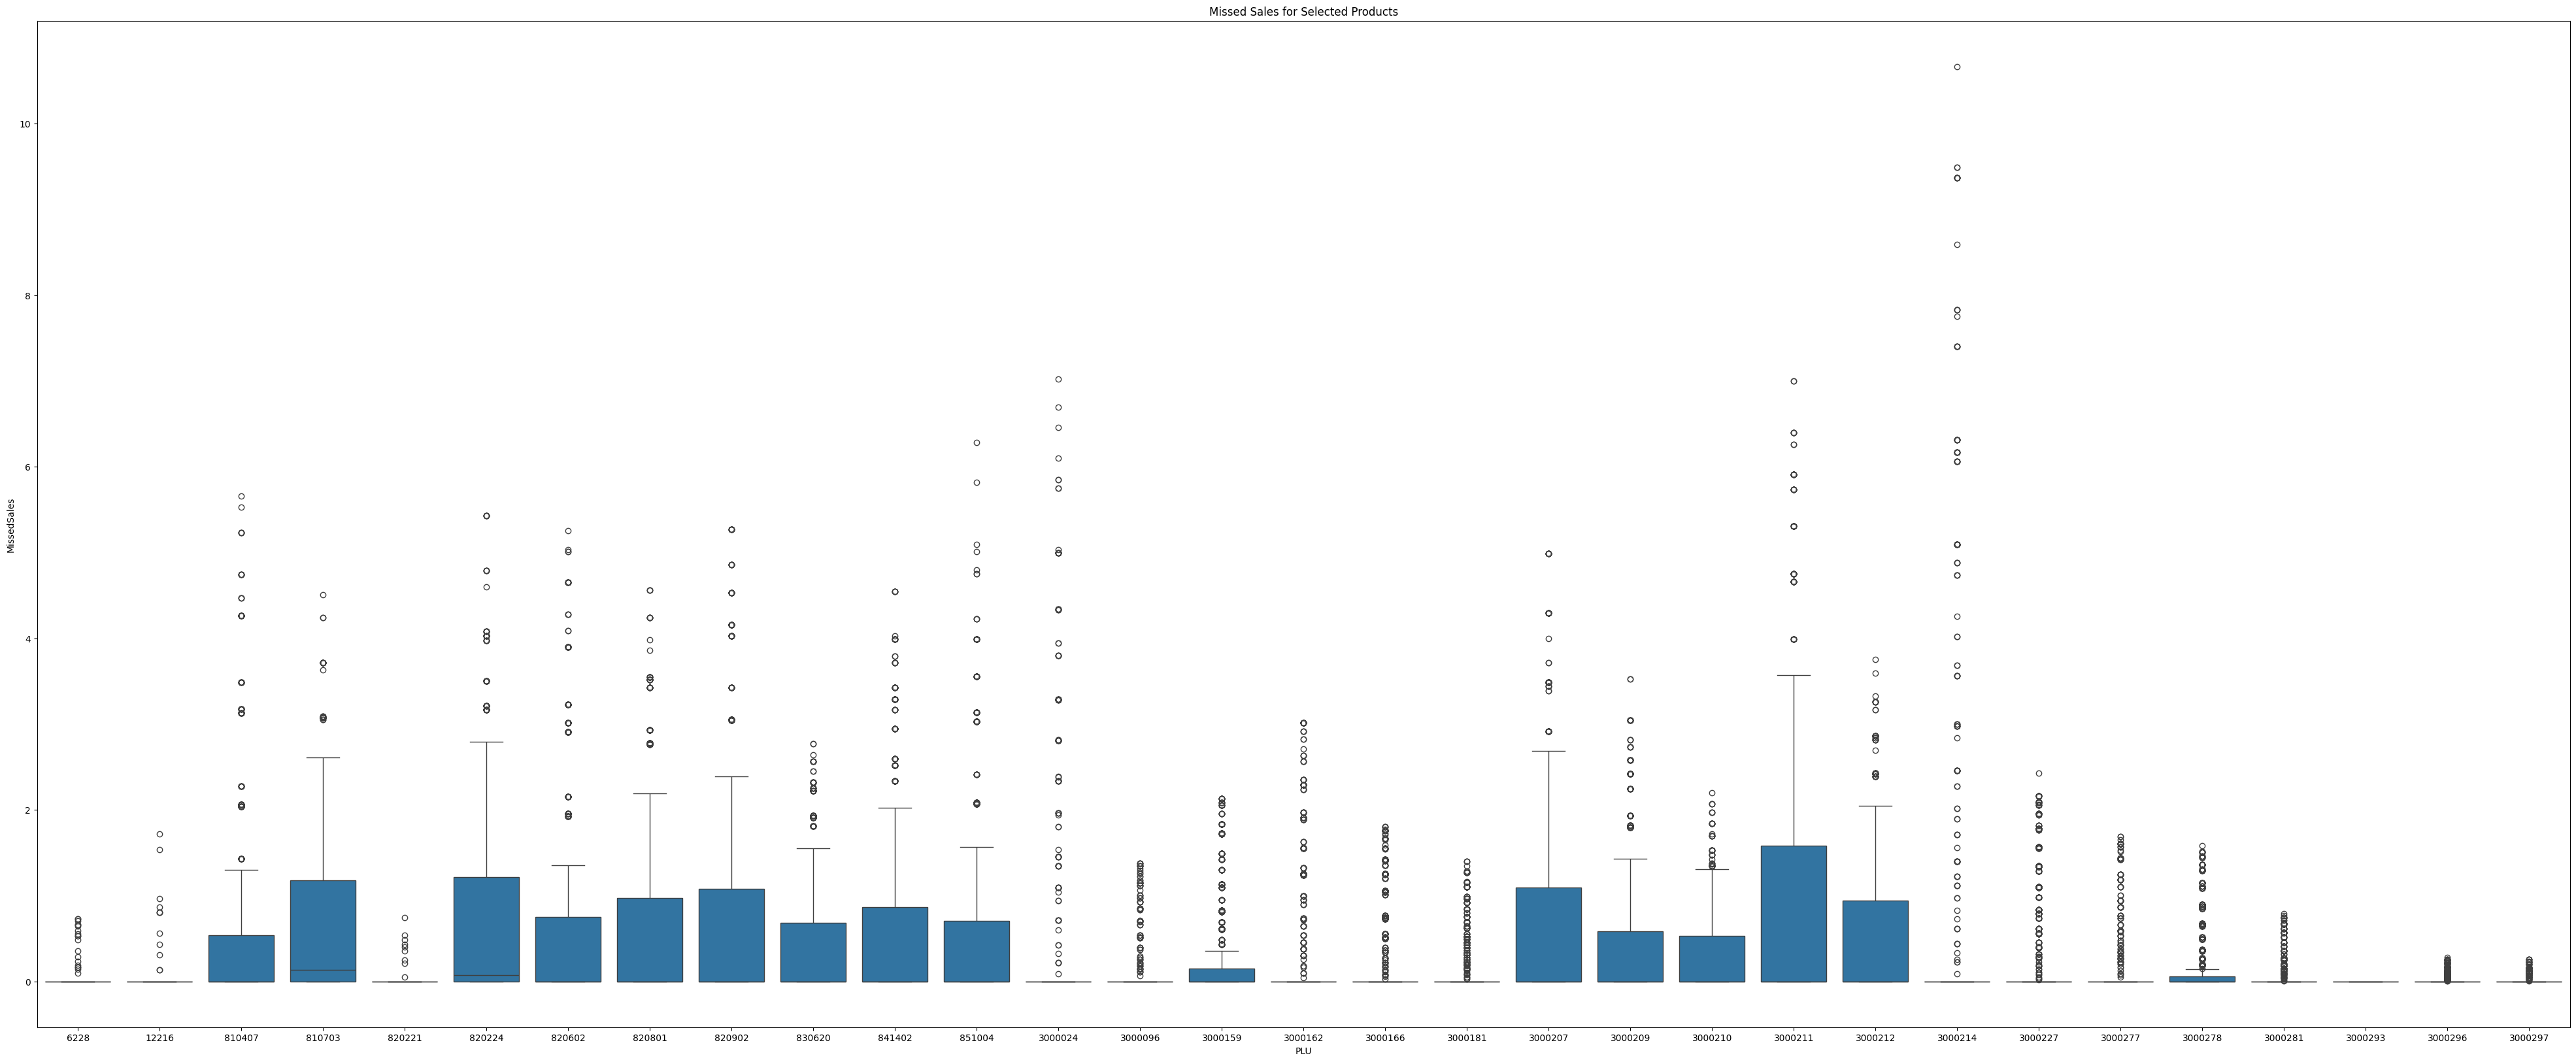

In [ ]:
# SECTION 1
# 1. Provide the box plots and statistics of 27 products, inventory patterns, stock out patterns
# and missed sales (note: do not rely on the missed sales data in the data set. See part 4 below for more information).

# Box plots for inventory patterns
plt.figure(figsize=(50, 20))
sns.boxplot(x='PLU', y='EndQuantity', data=df)
plt.title('Inventory Patterns for Selected Products')
plt.show()

# Box plots for stock out patterns
plt.figure(figsize=(50, 20))
sns.boxplot(x='PLU', y='StockedOut', data=df)
plt.title('Stock Out Patterns for Selected Products')
plt.show()

# Box plots for missed sales
plt.figure(figsize=(50, 20))
sns.boxplot(x='PLU', y='MissedSales', data=df)
plt.title('Missed Sales for Selected Products')
plt.show()

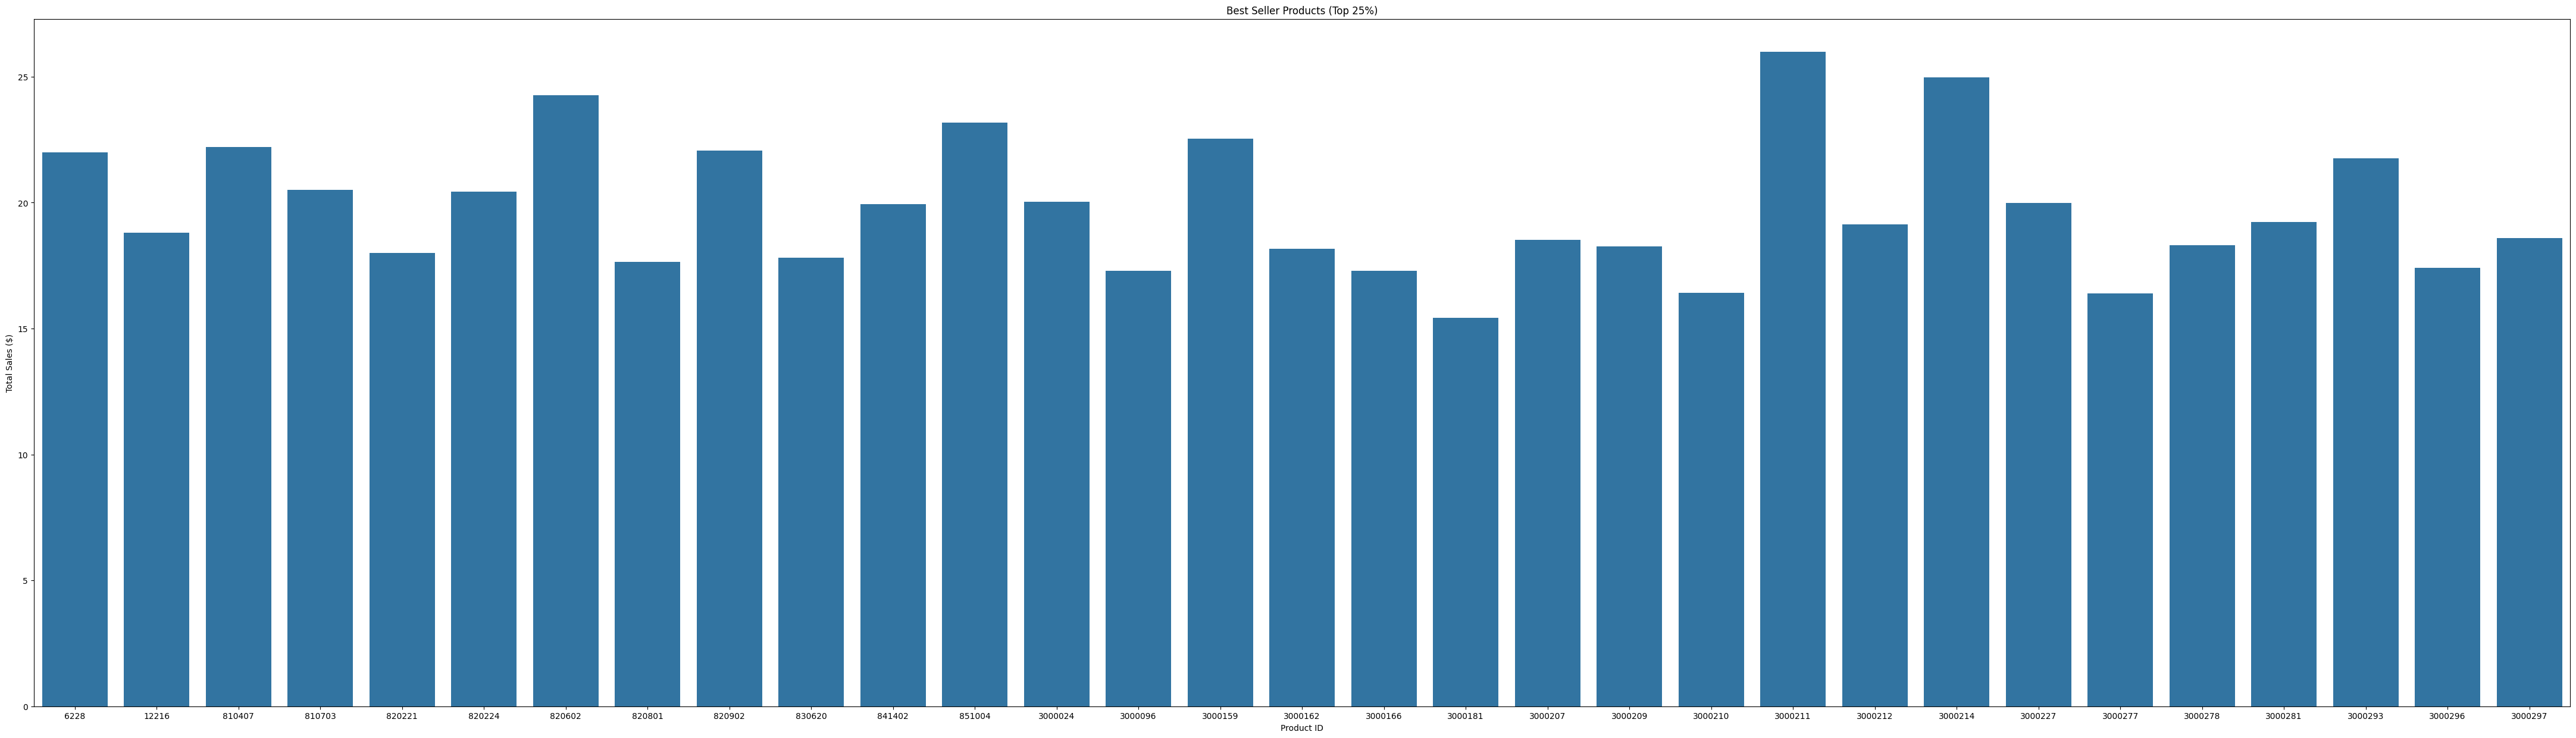

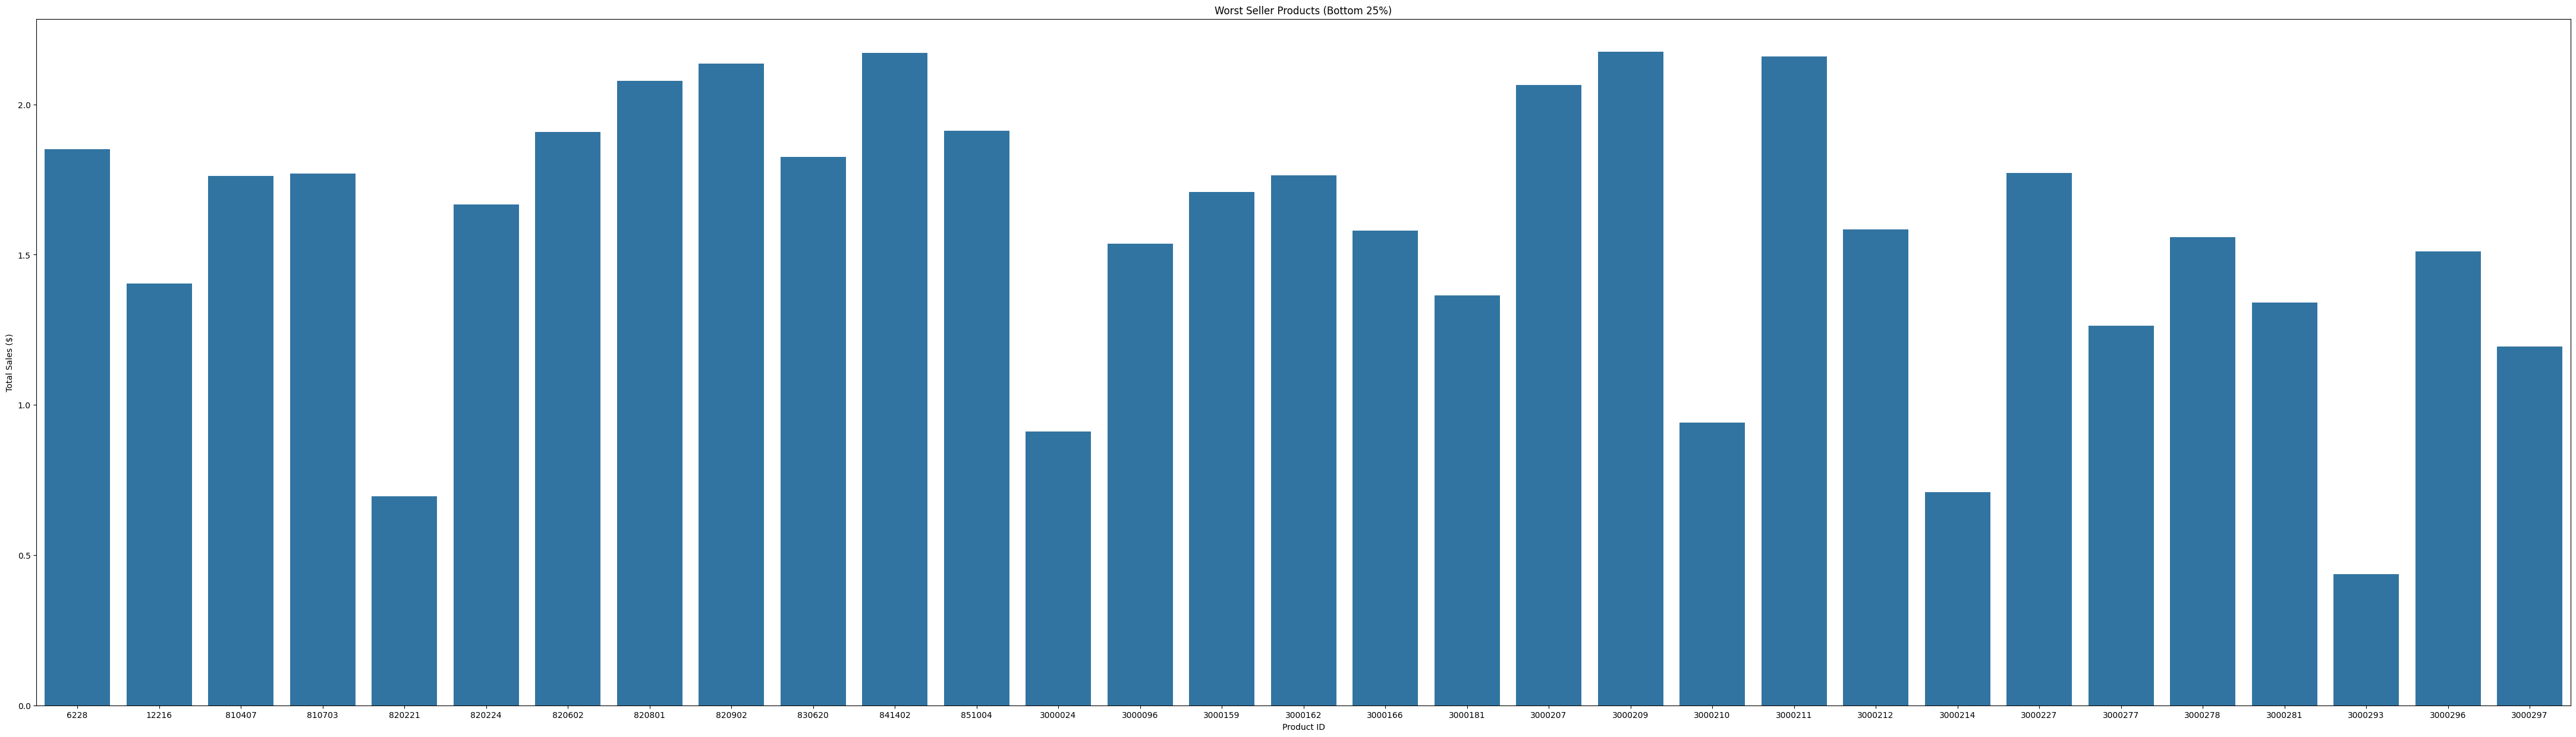

Average total sales for best seller products: $21.38
Average total sales for worst seller products: $1.41


In [ ]:
# 2. Show graphs of best seller and worst seller products of top 25% and bottom 25% and
# provide your insight into data. (The average selling price of a product is 3$). Go beyond
# graphs and just analyzing data. Think about “So What” when writing your report!

# Calculate total sales for each product
df['TotalSales'] = df['SoldQuantity'] * 3  # Assuming an average selling price of $3

top_25_percent = df[df['TotalSales'] >= df['TotalSales'].quantile(0.75)]
bottom_25_percent = df[df['TotalSales'] <= df['TotalSales'].quantile(0.25)]

# Plotting best seller products
plt.figure(figsize=(55, 15))
sns.barplot(x='PLU', y='TotalSales', data=top_25_percent, errorbar=None)
plt.title('Best Seller Products (Top 25%)')
plt.xlabel('Product ID')
plt.ylabel('Total Sales ($)')
plt.show()

# Plotting worst seller products
plt.figure(figsize=(55, 15))
sns.barplot(x='PLU', y='TotalSales', data=bottom_25_percent, errorbar=None)
plt.title('Worst Seller Products (Bottom 25%)')
plt.xlabel('Product ID')
plt.ylabel('Total Sales ($)')
plt.show()

top_avg_sales = top_25_percent['TotalSales'].mean()
bottom_avg_sales = bottom_25_percent['TotalSales'].mean()

print(f'Average total sales for best seller products: ${top_avg_sales:.2f}')
print(f'Average total sales for worst seller products: ${bottom_avg_sales:.2f}')

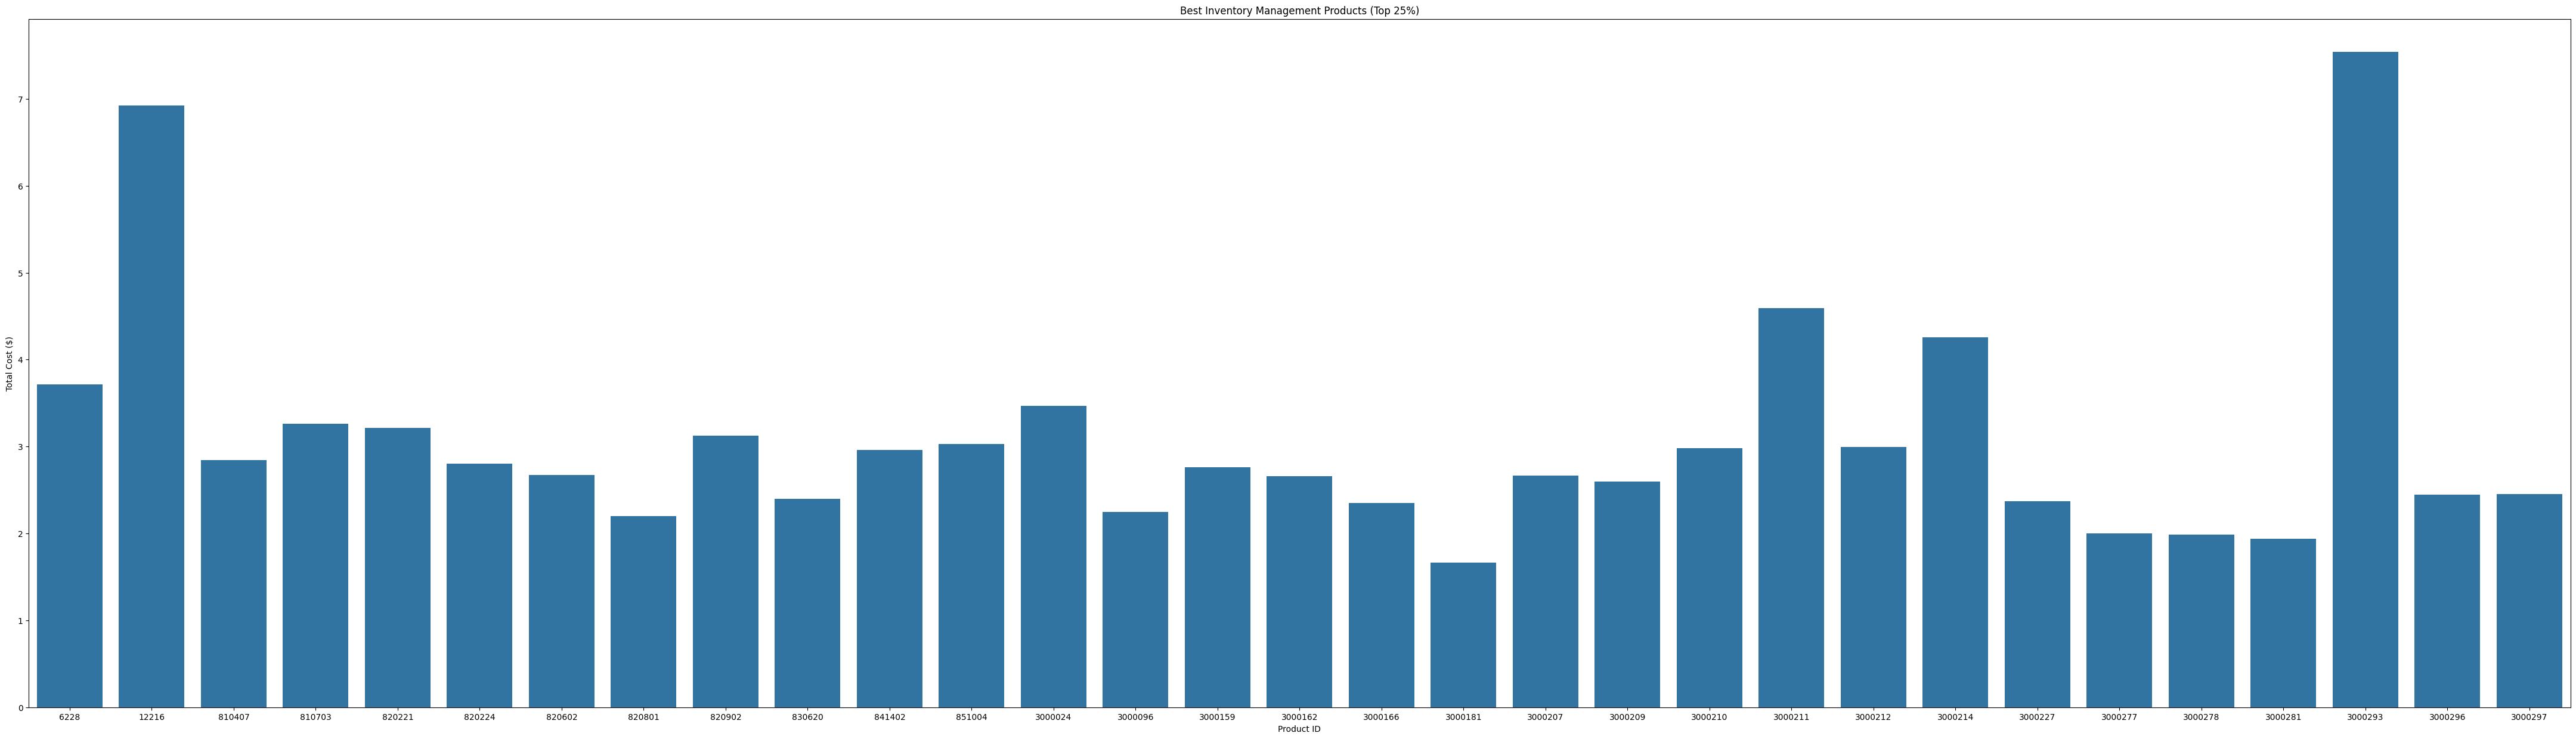

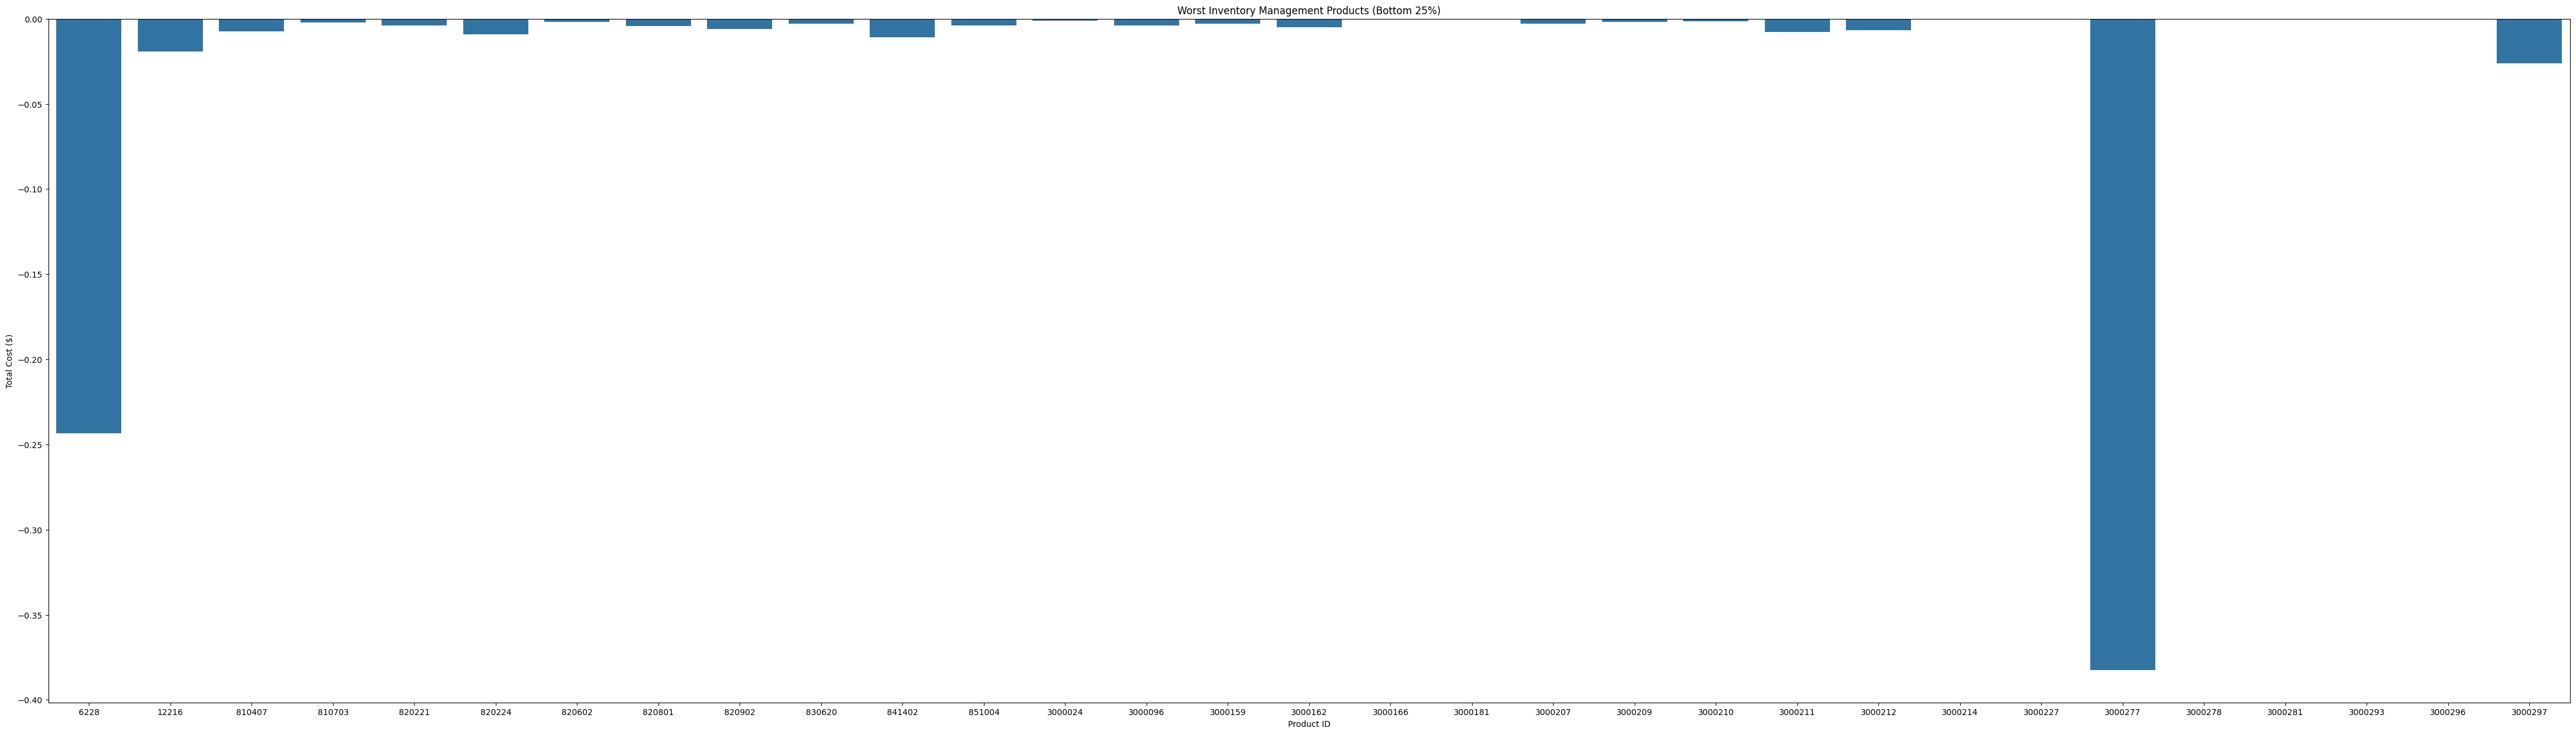

Average total cost for best inventory management products: $3.36
Average total cost for worst inventory management products: $-0.02


In [ ]:
# 3. Show graphs of best and worst products based on their inventory management - Top 25%
# and bottom 25% and provide your insight into data (the average cost of a product is 0.5$)
# Identify where/when the store gets rid of the unpurchased products. Go beyond graphs
# and just analyzing data. Think about “So What” when writing your report!

# Calculate the total cost for each product
average_cost = 0.5  # Assuming an average cost of $0.5 per product
df['TotalCost'] = df['EndQuantity'] * average_cost

# Identify top and bottom 25% based on TotalCost
top_25_percent_inventory = df[df['TotalCost'] >= df['TotalCost'].quantile(0.75)]
bottom_25_percent_inventory = df[df['TotalCost'] <= df['TotalCost'].quantile(0.25)]

# Plotting best inventory management products
plt.figure(figsize=(55, 15))
sns.barplot(x='PLU', y='TotalCost', data=top_25_percent_inventory, errorbar=None)
plt.title('Best Inventory Management Products (Top 25%)')
plt.xlabel('Product ID')
plt.ylabel('Total Cost ($)')
plt.show()

# Plotting worst inventory management products
plt.figure(figsize=(55, 15))
sns.barplot(x='PLU', y='TotalCost', data=bottom_25_percent_inventory, errorbar=None)
plt.title('Worst Inventory Management Products (Bottom 25%)')
plt.xlabel('Product ID')
plt.ylabel('Total Cost ($)')
plt.show()

# Provide insights
top_avg_cost = top_25_percent_inventory['TotalCost'].mean()
bottom_avg_cost = bottom_25_percent_inventory['TotalCost'].mean()

print(f'Average total cost for best inventory management products: ${top_avg_cost:.2f}')
print(f'Average total cost for worst inventory management products: ${bottom_avg_cost:.2f}')

# Identify when the store gets rid of unpurchased products
unpurchased_products = df[df['EndQuantity'] == 0]

/var/folders/m1/9dxyykxs7bv98h6tz14bkcnc0000gn/T/ipykernel_2847/761606740.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockouts['EstimatedLoss'] = losses


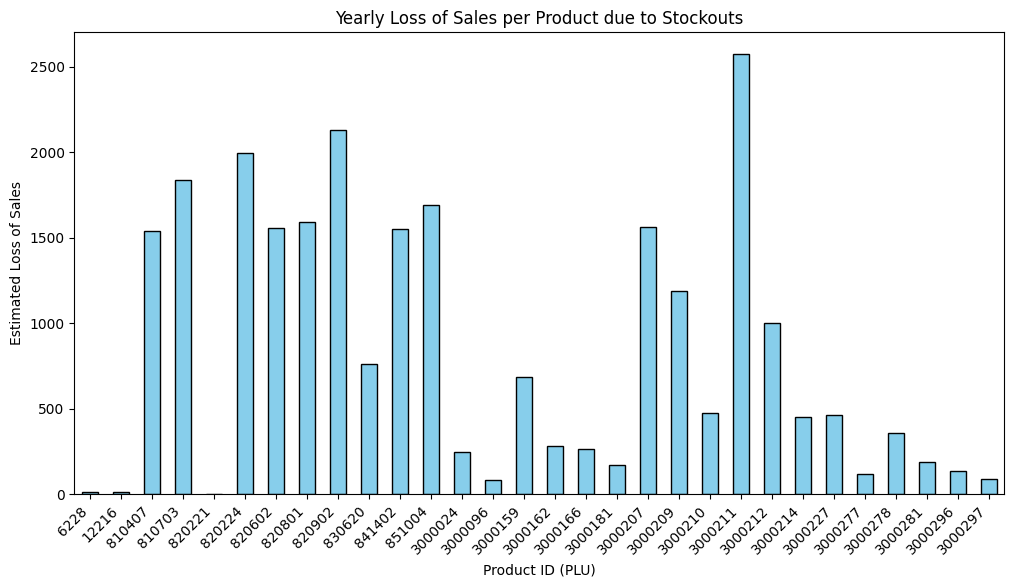

In [ ]:
# 4. Identify stock outs and estimate the loss of sales per year per product. Assume when we
# are out of stock, we conservatively lose 75% of the average of sales in the previous 4
# weeks on the same weekday. You are welcome to make other reasonable assumptions.
# Clearly explain your assumption.

# Convert 'BusinessDate' to datetime format
df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])

# Identify stockouts
stockouts = df[df['StockedOut'] == 1]

# Estimate loss of sales
losses = []

for index, stockout in stockouts.iterrows():
    product_id = stockout['PLU']
    weekday = stockout['BusinessDate'].weekday()

    # Calculate the average sales for the same product on the same weekday over the previous 4 weeks
    avg_sales_4_weeks = df[(df['PLU'] == product_id) &
                           (df['BusinessDate'].dt.weekday == weekday) &
                           (df['BusinessDate'] >= stockout['BusinessDate'] - pd.DateOffset(weeks=4)) &
                           (df['BusinessDate'] < stockout['BusinessDate'])]['SoldQuantity'].mean()

    # Assume a conservative loss of 75% of the average sales value
    estimated_loss = 0.75 * avg_sales_4_weeks
    losses.append(estimated_loss)

# Add the estimated losses to the DataFrame
stockouts['EstimatedLoss'] = losses

# Sum up the estimated losses for each product over the entire dataset
total_yearly_loss = stockouts.groupby('PLU')['EstimatedLoss'].sum()

total_yearly_loss.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Yearly Loss of Sales per Product due to Stockouts')
plt.xlabel('Product ID (PLU)')
plt.ylabel('Estimated Loss of Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

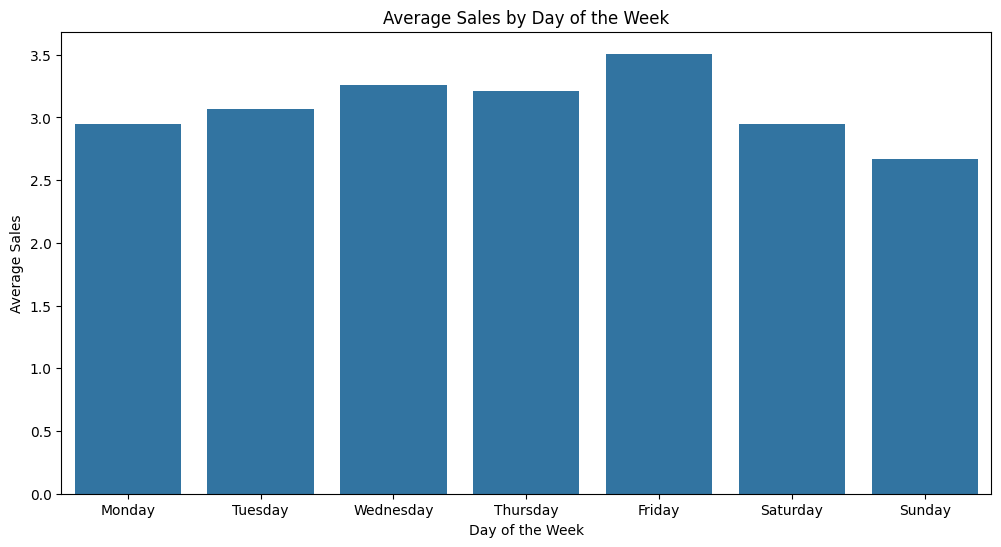

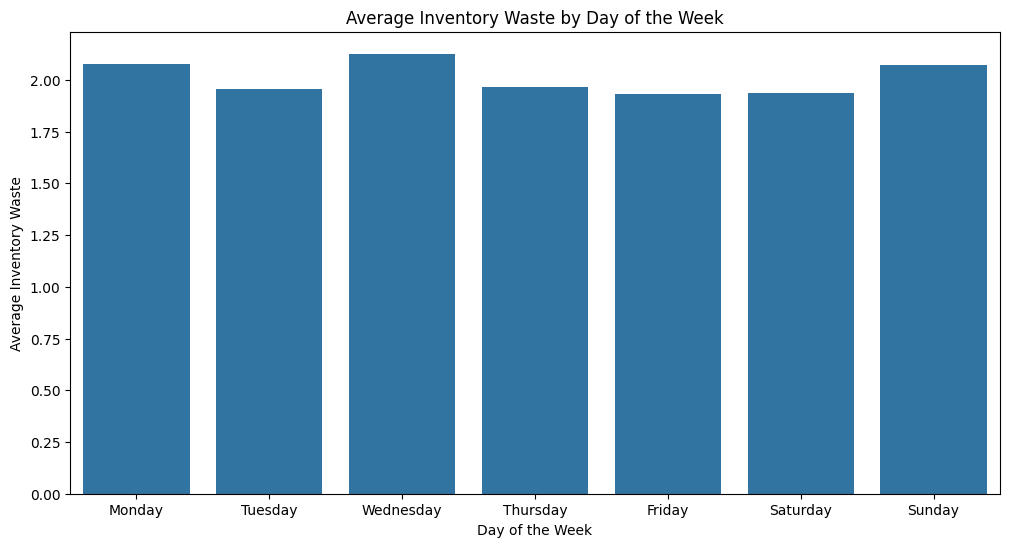

In [ ]:
# 5. Show graphically how the product sales and inventory waste change. Investigate
    # a. Impact of day of the week on sales and stocks (7 days)

df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])
df['DayOfWeek'] = df['BusinessDate'].dt.day_name()
daily_stats = df.groupby('DayOfWeek').agg({'SoldQuantity': 'mean', 'EndQuantity': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='SoldQuantity', data=daily_stats, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='EndQuantity', data=daily_stats, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Inventory Waste by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Inventory Waste')
plt.show()


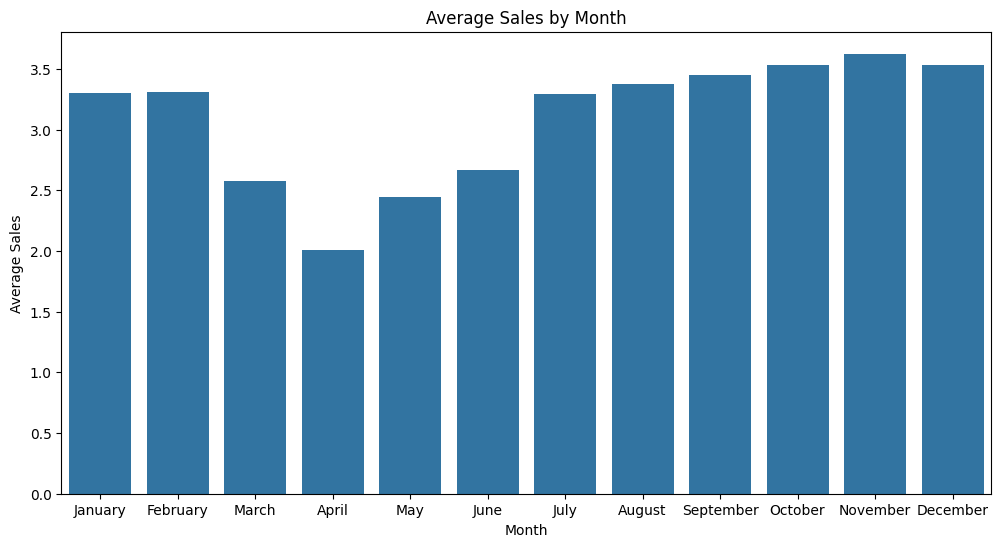

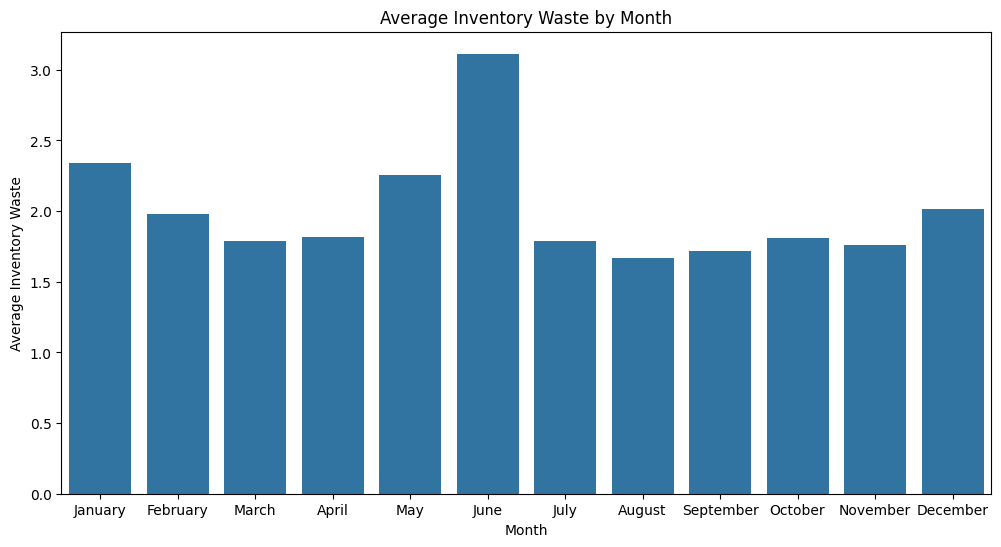

In [ ]:
# 5. b. Monthly changes and patterns (for the duration of the data)

df['Month'] = df['BusinessDate'].dt.month_name()
monthly_stats = df.groupby('Month').agg({'SoldQuantity': 'mean', 'EndQuantity': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='SoldQuantity', data=monthly_stats, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='EndQuantity', data=monthly_stats, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Average Inventory Waste by Month')
plt.xlabel('Month')
plt.ylabel('Average Inventory Waste')
plt.show()


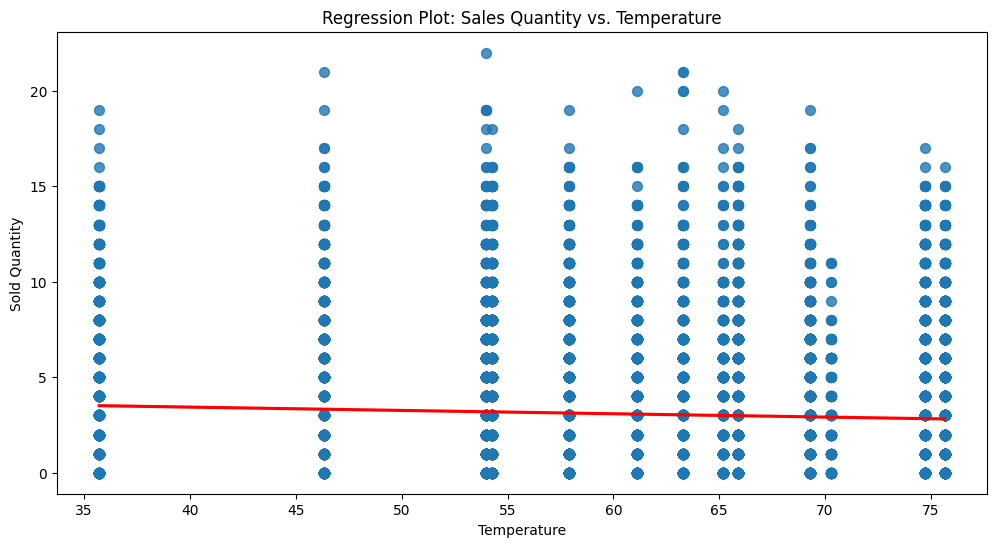

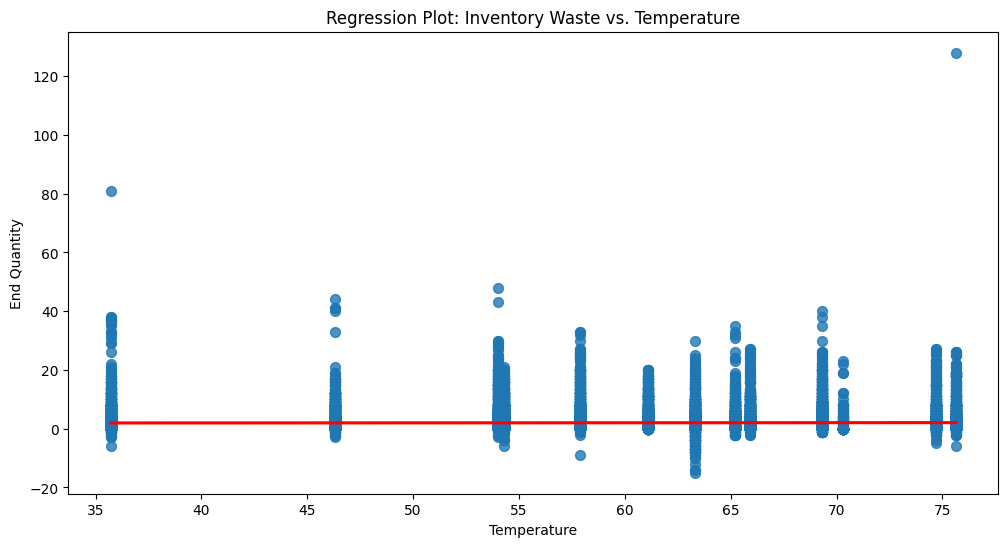

In [ ]:
# 5. c. Impact of weather condition based on two factors:
        # i. Temperature
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])

# Scatter plot with regression line for Sales Quantity and Temperature
plt.figure(figsize=(12, 6))
sns.regplot(x='Temperature', y='SoldQuantity', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Sales Quantity vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Sold Quantity')
plt.show()

# Scatter plot with regression line for Inventory Waste and Temperature
plt.figure(figsize=(12, 6))
sns.regplot(x='Temperature', y='EndQuantity', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Inventory Waste vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('End Quantity')
plt.show()

# Perform linear regression for Sales Quantity and Temperature
X_sales = sm.add_constant(df['Temperature'])
model_sales = sm.OLS(df['SoldQuantity'], X_sales).fit()

# Perform linear regression for Inventory Waste and Temperature
X_waste = sm.add_constant(df['Temperature'])
model_waste = sm.OLS(df['EndQuantity'], X_waste).fit()

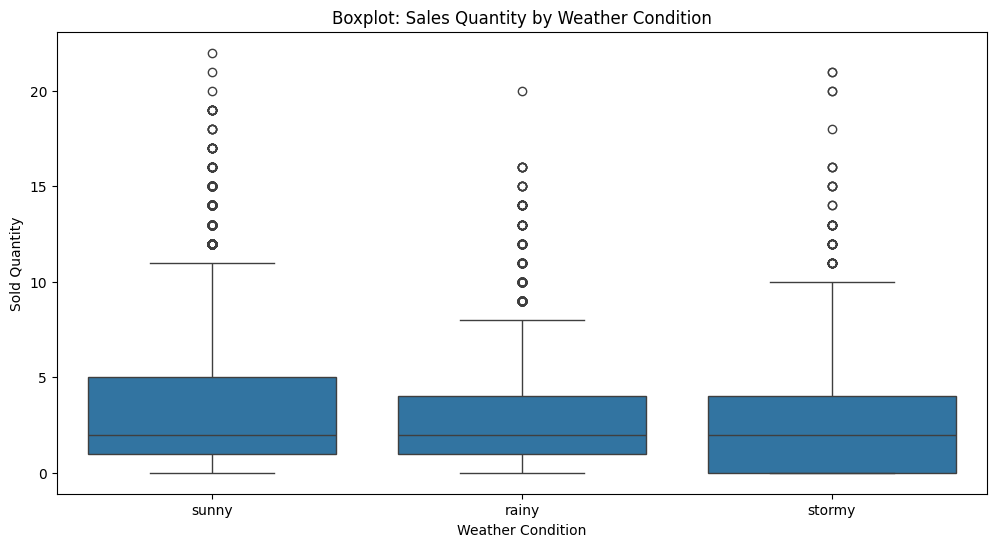

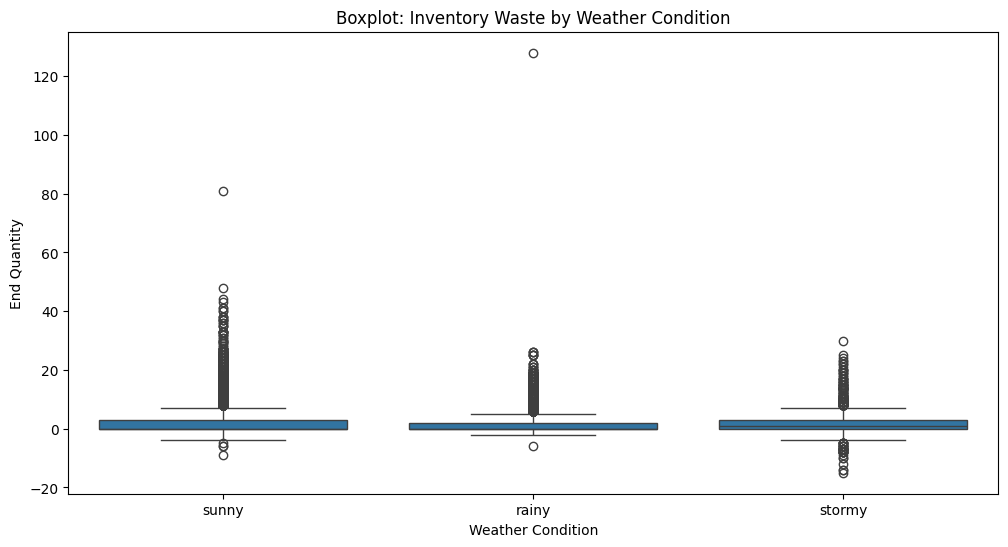

/Users/sandeep/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
# 5. c. Impact of weather condition based on two factors:
    # ii. Weather condition (sunny, raining, cloudy, etc.)
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway

df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])

# Boxplot for Sales Quantity and Weather
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='SoldQuantity', data=df)
plt.title('Boxplot: Sales Quantity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Sold Quantity')
plt.show()

# Boxplot for Inventory Waste and Weather
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather', y='EndQuantity', data=df)
plt.title('Boxplot: Inventory Waste by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('End Quantity')
plt.show()

anova_sales = f_oneway(df['SoldQuantity'][df['Weather'] == 'Sunny'],
                       df['SoldQuantity'][df['Weather'] == 'Raining'],
                       df['SoldQuantity'][df['Weather'] == 'Cloudy'],
                      )

anova_waste = f_oneway(df['EndQuantity'][df['Weather'] == 'Sunny'],
                       df['EndQuantity'][df['Weather'] == 'Raining'],
                       df['EndQuantity'][df['Weather'] == 'Cloudy'],
                      )

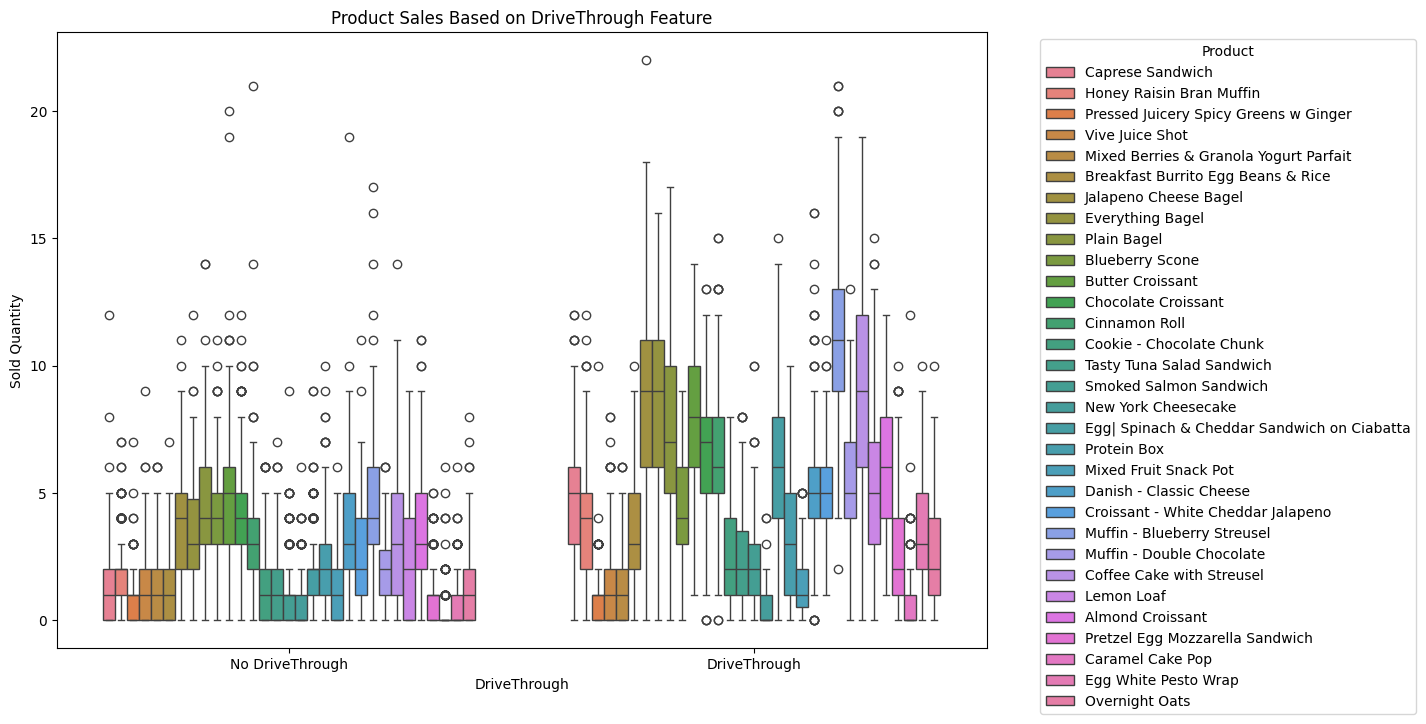

In [ ]:
# 6. Investigate whether drive thru feature causes certain products to sell better or worse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='DriveThrough', y='SoldQuantity', hue='Description', data=df)
plt.title('Product Sales Based on DriveThrough Feature')
plt.xlabel('DriveThrough')
plt.ylabel('Sold Quantity')
plt.xticks([0, 1], ['No DriveThrough', 'DriveThrough'])
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

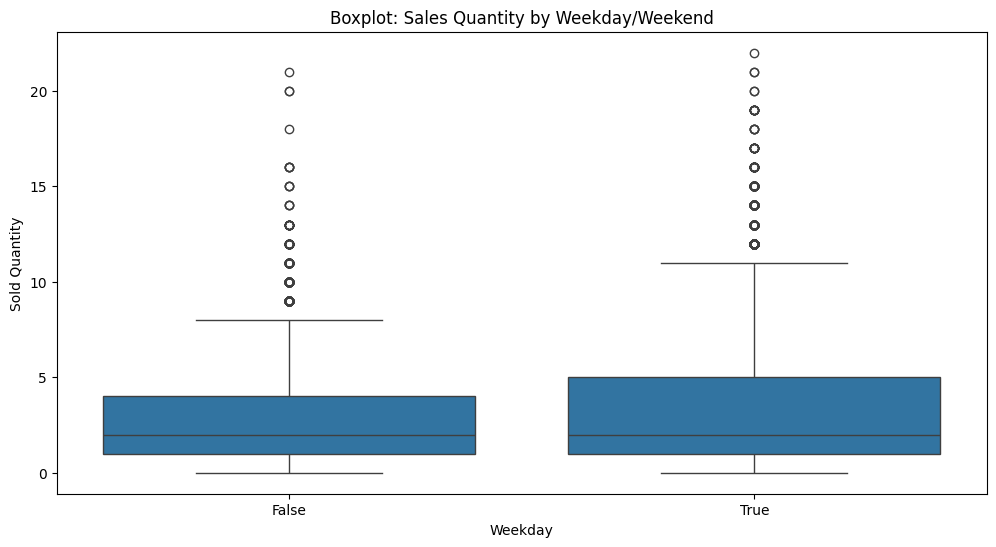

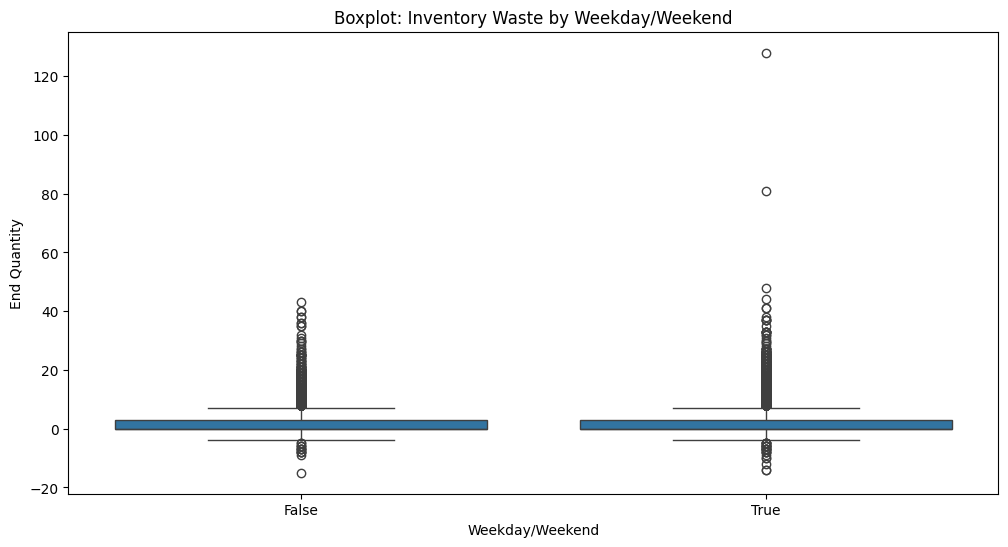

T-test for Sales Quantity between Weekdays and Weekends:
TtestResult(statistic=-10.600581407250818, pvalue=3.285424022132207e-26, df=30861.0)
T-test for Inventory Waste between Weekdays and Weekends:
TtestResult(statistic=-0.18755415004345435, pvalue=0.8512274042775643, df=30861.0)


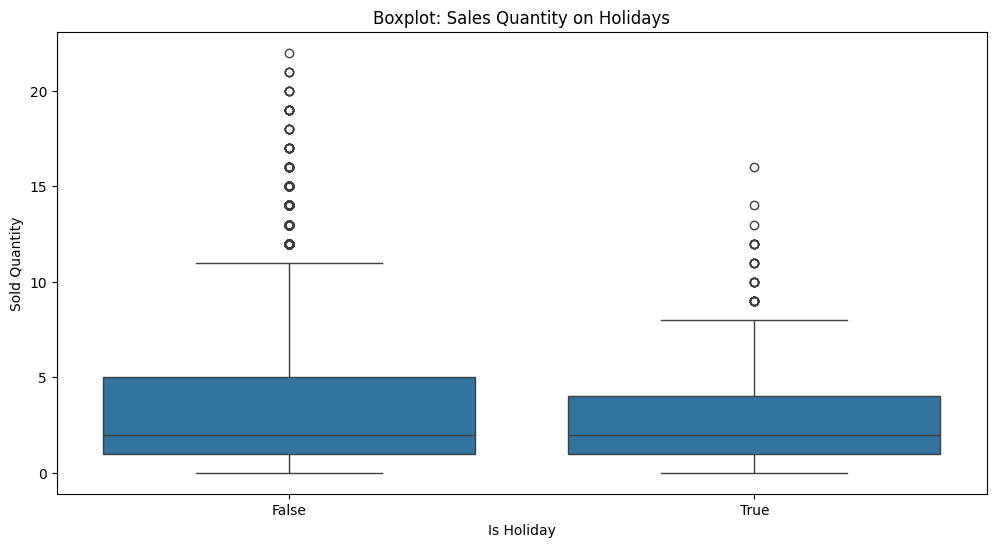

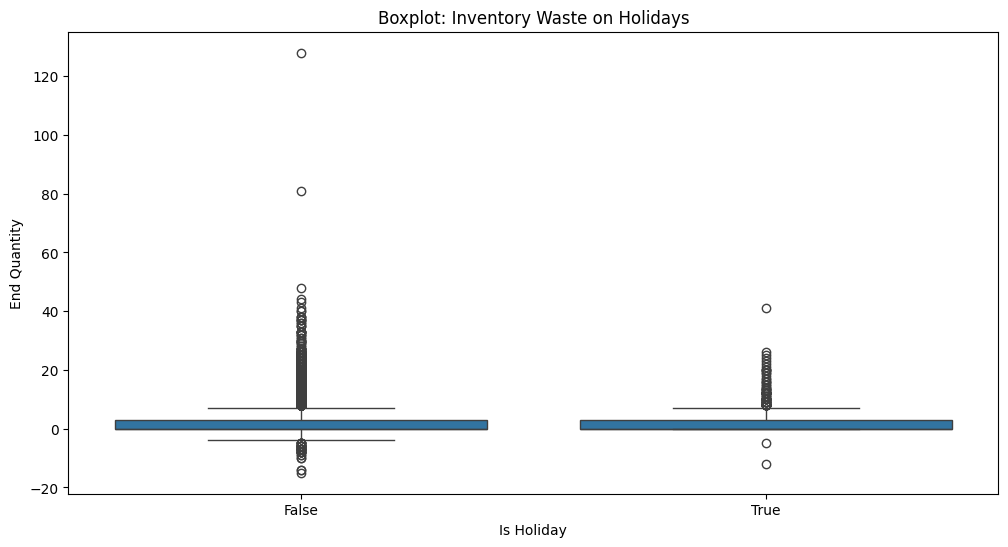

T-test for Sales Quantity between Holidays and non-Holidays:
TtestResult(statistic=1.7647779547756894, pvalue=0.07761098069269799, df=30861.0)
T-test for Inventory Waste between Holidays and non-Holidays:
TtestResult(statistic=-3.1938372988825456, pvalue=0.0014053618640078472, df=30861.0)


In [ ]:
# 7. Investigate the impact of weekday/weekends and National Holidays by adding extra features.
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

df['BusinessDate'] = pd.to_datetime(df['BusinessDate'])
df['Weekday'] = df['BusinessDate'].dt.dayofweek < 5  # Assuming 0-4 represent weekdays
df['Holiday'] = df['Holiday'].astype(bool)

# Boxplot for Sales Quantity by Weekday/Weekend
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weekday', y='SoldQuantity', data=df)
plt.title('Boxplot: Sales Quantity by Weekday/Weekend')
plt.xlabel('Weekday')
plt.ylabel('Sold Quantity')
plt.show()

# Boxplot for Inventory Waste by Weekday/Weekend
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weekday', y='EndQuantity', data=df)
plt.title('Boxplot: Inventory Waste by Weekday/Weekend')
plt.xlabel('Weekday/Weekend')
plt.ylabel('End Quantity')
plt.show()

ttest_sales = ttest_ind(df['SoldQuantity'][~df['Weekday']], df['SoldQuantity'][df['Weekday']])
print(f'T-test for Sales Quantity between Weekdays and Weekends:\n{ttest_sales}')

ttest_waste = ttest_ind(df['EndQuantity'][~df['Weekday']], df['EndQuantity'][df['Weekday']])
print(f'T-test for Inventory Waste between Weekdays and Weekends:\n{ttest_waste}')

# Boxplot for Sales Quantity by Holiday
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday', y='SoldQuantity', data=df)
plt.title('Boxplot: Sales Quantity on Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Sold Quantity')
plt.show()

# Boxplot for Inventory Waste by Holiday
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday', y='EndQuantity', data=df)
plt.title('Boxplot: Inventory Waste on Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('End Quantity')
plt.show()

ttest_sales_holiday = ttest_ind(df['SoldQuantity'][~df['Holiday']], df['SoldQuantity'][df['Holiday']])
print(f'T-test for Sales Quantity between Holidays and non-Holidays:\n{ttest_sales_holiday}')

ttest_waste_holiday = ttest_ind(df['EndQuantity'][~df['Holiday']], df['EndQuantity'][df['Holiday']])
print(f'T-test for Inventory Waste between Holidays and non-Holidays:\n{ttest_waste_holiday}')

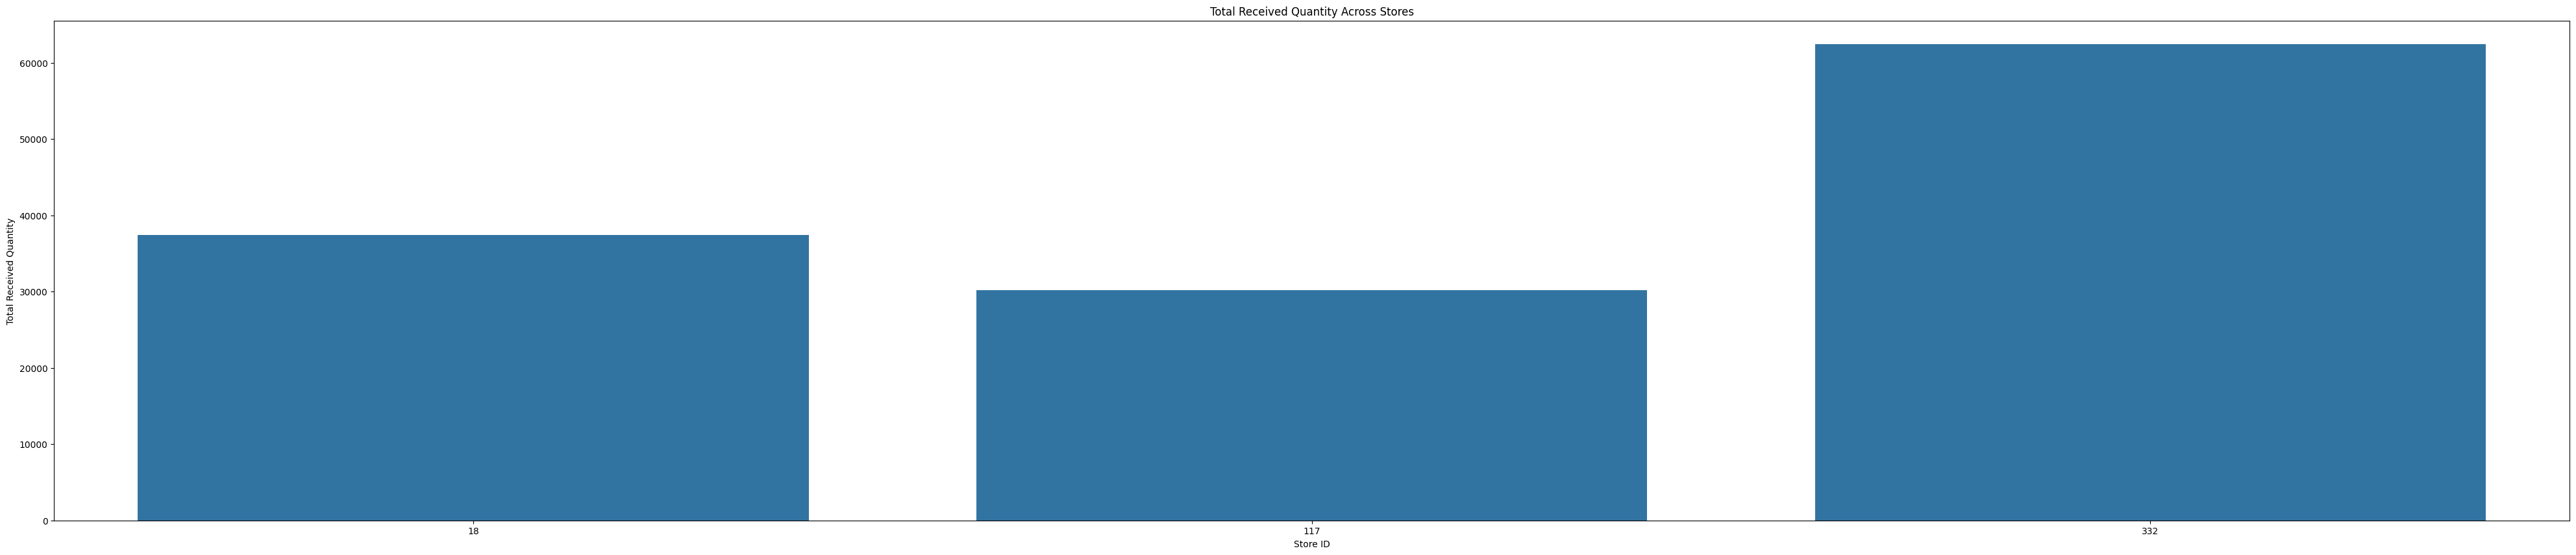

In [ ]:
# 8. Based on the store data, identify the stocking patterns across multiple stores. Are they
# provided with new products every day or restocking happens less frequently based on your insights?
# Assuming you have 'StoreID' and 'ReceivedQuantity' columns in your dataset
# Replace 'StoreID' and 'ReceivedQuantity' with the actual column names in your dataset

store_received_quantity = df.groupby('StoreID')['ReceivedQuantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(50, 10))
sns.barplot(x='StoreID', y='ReceivedQuantity', data=store_received_quantity)
plt.title('Total Received Quantity Across Stores')
plt.xlabel('Store ID')
plt.ylabel('Total Received Quantity')
plt.show()


In [ ]:
def get_optimal_features_correlation(df, target_feature):
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()
    threshold = 0.4
    selected_features = correlation_matrix[abs(correlation_matrix[target_feature]) > threshold].index.tolist()
    selected_features.remove(target_feature)
    return selected_features

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def get_optimal_features_rf(df, target_feature):
    numeric_df = df.select_dtypes(include='number')
    X = numeric_df.drop(target_feature, axis=1)
    y = numeric_df[target_feature]
    model = RandomForestRegressor()
    model.fit(X, y)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    N = 3
    return feature_importances.nlargest(N).index.tolist()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def get_optimal_features_rfe(df, target_feature):
    numeric_df = df.select_dtypes(include='number')
    X = numeric_df.drop(target_feature, axis=1)
    y = numeric_df[target_feature]
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=4)
    rfe.fit(X, y)

    return X.columns[rfe.support_]

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def get_optimal_features_lasso(df, target_feature):
    numeric_df = df.select_dtypes(include='number')
    X = numeric_df.drop(target_feature, axis=1)
    y = numeric_df[target_feature]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    alphas = [0.001, 0.01, 0.1, 1, 10]
    lasso_cv = LassoCV(alphas=alphas, cv=5)
    lasso_cv.fit(X_train_scaled, y_train)

    return X.columns[lasso_cv.coef_ != 0]

Selected Features: ['Temperature', 'ReceivedQuantity', 'LatestOrder', 'Precipitation', 'Humidity']


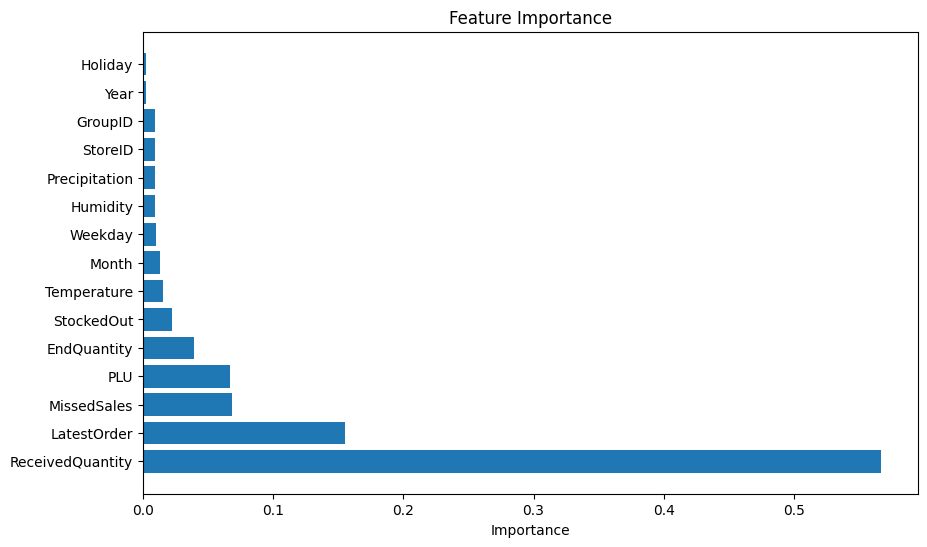

In [ ]:
#SECTION 2
# 2. Iterate through different combinations of features to identify the optimal features and
# remove potential correlated features (if any) for your predictions. Add weather,
# weekdays, holidays and temperature data to your features.
target_feature = 'SoldQuantity'
selected_features_correlation = get_optimal_features_correlation(df, target_feature)
selected_features_rf = get_optimal_features_rf(df, target_feature)
selected_features_rfe = get_optimal_features_rfe(df, target_feature)
selected_features_lasso = get_optimal_features_lasso(df, target_feature)

common_features = set(selected_features_correlation).intersection(selected_features_rf, selected_features_rfe, selected_features_lasso)
common_features.update({'ReceivedQuantity', 'LatestOrder', 'Temperature', 'Humidity', 'Precipitation'})
selected_features = list(common_features)

if 'TotalSales' in selected_features:
    selected_features.remove('TotalSales')

print("Selected Features:", selected_features)

numeric_df = df.select_dtypes(include='number')
X = numeric_df.drop(target_feature, axis=1)
y = numeric_df[target_feature]

rf_model = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor()
mse_scorer = make_scorer(mean_squared_error)

grid_search = GridSearchCV(rf_model, param_grid, scoring=mse_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters for RandomForestRegressor:", best_params)
print("Mean Squared Error on Test Set:", mse)


Best Hyperparameters for RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error on Test Set: 0.0007822378641916154


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming you have your data and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Define the Mean Squared Error as the scoring metric
mse_scorer = make_scorer(mean_squared_error)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(gb_model, param_grid, scoring=mse_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_gb_model = GradientBoostingRegressor(**best_params)
best_gb_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters for GradientBoostingRegressor:", best_params)
print("Mean Squared Error on Test Set:", mse)


Best Hyperparameters for GradientBoostingRegressor: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error on Test Set: 3.2519816508863015


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

# Assuming you have your data and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an XGBRegressor
xgb_model = XGBRegressor()

# Define the Mean Squared Error as the scoring metric
mse_scorer = make_scorer(mean_squared_error)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(xgb_model, param_grid, scoring=mse_scorer, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters for XGBRegressor:", best_params)
print("Mean Squared Error on Test Set:", mse)

Best Hyperparameters for XGBRegressor: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Mean Squared Error on Test Set: 3.6479464563640542


In [ ]:
# 3. (optional) Start with a quick linear regression to get a sense of data. Linear regression
# may not result in a great prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[selected_features]
y = df[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'LinearRegression Mean Squared Error: {mse}')
print(f'for LinearRegression R-squared: {r2}')

LinearRegression Mean Squared Error: 3.7833389486966955e-27
for LinearRegression R-squared: 1.0


In [ ]:
def get_rf_model(X_train, y_train, selected_features):
    rf_model = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state = 42)
    rf_model.fit(X_train, y_train)

    return rf_model

In [ ]:
def get_gbm_model(X_train, y_train, selected_features):
    gbm_model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 3, min_samples_leaf =  2, min_samples_split =  2, n_estimators =  50)
    gbm_model.fit(X_train, y_train)

    return gbm_model

In [ ]:
def get_xgb_model(X_train, y_train, selected_features):
    xgb_model = XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.01, max_depth = 3, min_child_weight = 5, n_estimators = 50, subsample = 0.8)
    xgb_model.fit(X_train, y_train)

    return xgb_model

In [ ]:
# 4 Use ensemble models. Develop the following models and compare the accuracies by appropriate metric.
# a. Random Forest
# b. Gradient Boosting Machine
# c. XGBoost
# Perform a quick sensitivity analysis on the parameters of the model and try to finetune
# the default values where you see an opportunity to improve the model. Improving the
# machine learning models is where a data scientists will shine in their career and ahead
# of the game from others.

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df[selected_features]
y = df[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the Random Forest model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

# Define and train the Gradient Boosting model
# gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 3, min_samples_leaf =  2, min_samples_split =  2, n_estimators =  50)
gbm_model.fit(X_train_scaled, y_train)
gbm_predictions = gbm_model.predict(X_test_scaled)

# Evaluate Gradient Boosting model
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)

print(f"Gradient Boosting Mean Squared Error: {gbm_mse}")
print(f"Gradient Boosting R-squared: {gbm_r2}")

# Define and train the XGBoost model
# xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(colsample_bytree = 0.8, learning_rate = 0.01, max_depth = 3, min_child_weight = 5, n_estimators = 50, subsample = 0.8)
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost R-squared: {xgb_r2}")

Random Forest Mean Squared Error: 0.0001660456828122468
Random Forest R-squared: 0.9999806628534806
Gradient Boosting Mean Squared Error: 3.251981650886302
Gradient Boosting R-squared: 0.6212846693974187
XGBoost Mean Squared Error: 3.7885913879969206
XGBoost R-squared: 0.5587928241746679


In [ ]:
# 6. As we are dealing with time-series data, we would like to compare the results of the previous models with the following deep methods:
    # a.CNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

features = df[selected_features + [target_feature]].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size + 1):
        sequence = data[i:i + window_size]
        sequences.append(sequence)
    return np.array(sequences)

window_size = 10
sequences = create_sequences(features_scaled, window_size)

# Prepare training data
X = sequences[:, :-1, :-1]
y = sequences[:, -1, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'CNN Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'CNN R-squared: {r2}')


Epoch 1/10
772/772 [==============================] - 1s 1ms/step - loss: 0.9300 - val_loss: 0.9427
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 0.9075 - val_loss: 0.9493
Epoch 3/10
772/772 [==============================] - 1s 1ms/step - loss: 0.8982 - val_loss: 0.9503
Epoch 4/10
772/772 [==============================] - 1s 1ms/step - loss: 0.8934 - val_loss: 0.9436
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 0.8894 - val_loss: 0.9389
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 0.8862 - val_loss: 0.9365
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 0.8825 - val_loss: 0.9305
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 0.8799 - val_loss: 0.9344
Epoch 9/10
772/772 [==============================] - 1s 1ms/step - loss: 0.8754 - val_loss: 0.9350
Epoch 10/10
193/193 [==============================] - 0s 406us/step - loss: 0.9383
Test Loss: 0.938

In [ ]:
#6.b. LSTM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

features = df[selected_features + [target_feature]].values

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size + 1):
        sequence = data[i:i + window_size]
        sequences.append(sequence)
    return np.array(sequences)

window_size = 10
sequences = create_sequences(features_scaled, window_size)

X = sequences[:, :-1, :-1]
y = sequences[:, -1, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'LSTM Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'LSTM R-squared: {r2}')

Epoch 1/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8758 - val_loss: 0.8747
Epoch 2/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8574 - val_loss: 0.8710
Epoch 3/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8528 - val_loss: 0.8694
Epoch 4/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8509 - val_loss: 0.8675
Epoch 5/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8488 - val_loss: 0.8736
Epoch 6/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8465 - val_loss: 0.8774
Epoch 7/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8461 - val_loss: 0.8687
Epoch 8/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8437 - val_loss: 0.8640
Epoch 9/10
772/772 [==============================] - 2s 2ms/step - loss: 0.8419 - val_loss: 0.8674
Epoch 10/10
193/193 [==============================] - 0s 753us/step - loss: 0.8684
Test Loss: 0.868

In [ ]:
#6.c. Transformer
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sequence_length = 10
sequences = [np.array(df[selected_features][i:i + sequence_length]) for i in range(len(df) - sequence_length)]

X = np.array(sequences)
y = np.array(df[target_feature][sequence_length:])

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(selected_features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(selected_features)))

def build_transformer_model():
    input_layer = layers.Input(shape=(sequence_length, len(selected_features)))

    attention_output = layers.MultiHeadAttention(num_heads=2, key_dim=2)(input_layer, input_layer)
    attention_output = layers.LayerNormalization(epsilon=1e-6)(attention_output)

    global_avg_pooling = layers.GlobalAveragePooling1D()(attention_output)

    dense_output = layers.Dense(64, activation='relu')(global_avg_pooling)
    dense_output = layers.Dropout(0.1)(dense_output)

    output_layer = layers.Dense(1)(dense_output)

    model = keras.Model(inputs=input_layer, outputs=output_layer)
    return model

transformer_model = build_transformer_model()
transformer_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')  # Use appropriate loss function
transformer_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred_transformer = transformer_model.predict(X_test)

mse_transformer = mean_squared_error(y_test, y_pred_transformer)
print(f'Transformer Mean Squared Error: {mse_transformer}')

r2 = r2_score(y_test, y_pred)
print(f'Transformer R-squared: {r2}')

Epoch 1/10
772/772 [==============================] - 1s 1ms/step - loss: 8.9186 - val_loss: 7.1924
Epoch 2/10
772/772 [==============================] - 1s 1ms/step - loss: 8.4190 - val_loss: 7.1371
Epoch 3/10
772/772 [==============================] - 1s 987us/step - loss: 8.4097 - val_loss: 7.0609
Epoch 4/10
772/772 [==============================] - 1s 994us/step - loss: 8.3999 - val_loss: 7.1882
Epoch 5/10
772/772 [==============================] - 1s 1ms/step - loss: 8.3766 - val_loss: 7.3143
Epoch 6/10
772/772 [==============================] - 1s 1ms/step - loss: 8.3694 - val_loss: 7.1205
Epoch 7/10
772/772 [==============================] - 1s 1ms/step - loss: 8.3847 - val_loss: 7.1169
Epoch 8/10
772/772 [==============================] - 1s 1ms/step - loss: 8.3840 - val_loss: 7.3180
Epoch 9/10
772/772 [==============================] - 1s 998us/step - loss: 8.3667 - val_loss: 7.1285
Epoch 10/10
193/193 [==============================] - 0s 578us/step
Transformer Mean Squared 

In [ ]:
# (Extra credit) in 6.  RNN with Attention
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sequence_length = 10
sequences = [np.array(df[selected_features][i:i + sequence_length]) for i in range(len(df) - sequence_length)]

X = np.array(sequences)
y = np.array(df[target_feature][sequence_length:])

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

class AttentionLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name='W_q', shape=(input_shape[-1], input_shape[-1]), initializer='uniform', trainable=True)
        self.W_k = self.add_weight(name='W_k', shape=(input_shape[-1], input_shape[-1]), initializer='uniform', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        v = x

        attention_weights = tf.nn.softmax(tf.matmul(q, k, transpose_b=True))
        output = tf.matmul(attention_weights, v)

        return output

    def compute_output_shape(self, input_shape):
        return input_shape

def build_rnn_attention_model():
    input_layer = layers.Input(shape=(sequence_length, len(selected_features)))

    # LSTM layer
    lstm_output = layers.LSTM(64, return_sequences=True)(input_layer)

    # Attention layer
    attention_output = AttentionLayer()(lstm_output)

    # Global average pooling
    global_avg_pooling = layers.GlobalAveragePooling1D()(attention_output)

    # Dense layers
    dense_output = layers.Dense(64, activation='relu')(global_avg_pooling)
    dense_output = layers.Dropout(0.1)(dense_output)

    # Output layer
    output_layer = layers.Dense(1)(dense_output)

    model = keras.Model(inputs=input_layer, outputs=output_layer)
    return model

rnn_attention_model = build_rnn_attention_model()
rnn_attention_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')  # Use appropriate loss function
rnn_attention_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred_rnn_attention = rnn_attention_model.predict(X_test)

mse_rnn_attention = mean_squared_error(y_test, y_pred_rnn_attention)
print(f'RNN with Attention Mean Squared Error: {mse_rnn_attention}')

r2 = r2_score(y_test, y_pred)
print(f'RNN with Attention R-squared: {r2}')

Epoch 1/10
  1/772 [..............................] - ETA: 11:07 - loss: 12.9108

W0000 00:00:1702700761.583798       1 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" model: "0" frequency: 2400 num_cores: 10 environment { key: "cpu_instruction_set" value: "ARM NEON" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 16384 l2_cache_size: 524288 l3_cache_size: 524288 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


769/772 [============================>.] - ETA: 0s - loss: 7.9996

W0000 00:00:1702700764.896391       1 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" model: "0" frequency: 2400 num_cores: 10 environment { key: "cpu_instruction_set" value: "ARM NEON" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 16384 l2_cache_size: 524288 l3_cache_size: 524288 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


772/772 [==============================] - 4s 4ms/step - loss: 7.9946 - val_loss: 6.9268
Epoch 2/10
772/772 [==============================] - 3s 4ms/step - loss: 7.6580 - val_loss: 6.9545
Epoch 3/10
772/772 [==============================] - 3s 5ms/step - loss: 7.6148 - val_loss: 6.8675
Epoch 4/10
772/772 [==============================] - 3s 4ms/step - loss: 7.5808 - val_loss: 7.4529
Epoch 5/10
772/772 [==============================] - 3s 4ms/step - loss: 7.5503 - val_loss: 7.0899
Epoch 6/10
772/772 [==============================] - 3s 4ms/step - loss: 7.5335 - val_loss: 7.6047
Epoch 7/10
772/772 [==============================] - 3s 4ms/step - loss: 7.5053 - val_loss: 7.3895
Epoch 8/10
772/772 [==============================] - 4s 5ms/step - loss: 7.5132 - val_loss: 7.0797
Epoch 9/10
772/772 [==============================] - 3s 4ms/step - loss: 7.5041 - val_loss: 7.4997
Epoch 10/10
134/193 [===================>..........] - ETA: 0s

W0000 00:00:1702700796.052302       1 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" model: "0" frequency: 2400 num_cores: 10 environment { key: "cpu_instruction_set" value: "ARM NEON" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 16384 l2_cache_size: 524288 l3_cache_size: 524288 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


193/193 [==============================] - 0s 1ms/step
RNN with Attention Mean Squared Error: 7.2880413889678675
RNN with Attention R-squared: -0.8587222764315681


Predicted Sales Quantity for the Next Day: [7.48758333]
Predicted Sales Quantity for 3 Days Ahead: [10.64047619]
Predicted Sales Quantity for 10 Days Ahead: [1.6915]


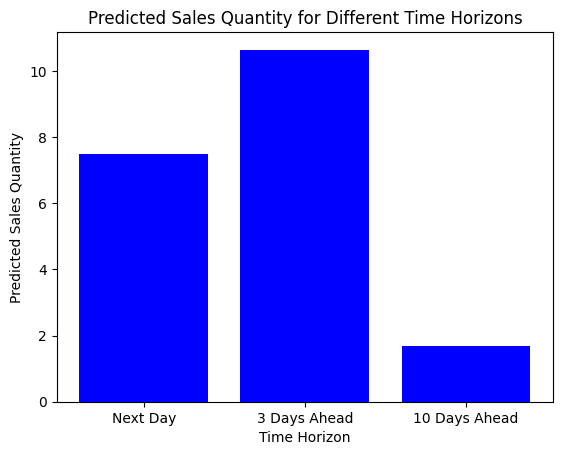

In [ ]:
# 7.Based on the results from the models above, we would like to predict sales based on the following scheme:
# a.1 day ahead ii) 3 days ahead (shipping from corporate warehouse) iii)10 days ahead (distributer order to the manufacturer)

selected_features = ['ReceivedQuantity', 'Precipitation', 'LatestOrder', 'Temperature', 'Humidity']
# selected_features.remove('TotalSales')
X = df[selected_features]
y = df['SoldQuantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using selected features
rf_model = get_rf_model(X_train, y_train, selected_features);
rf_model.fit(X_train[selected_features], y_train)

# Make predictions for the next day
X_next_day = pd.DataFrame({
    'Temperature': 25.3,
    'Humidity': 15.7,
    'Precipitation': 10.2,
    'ReceivedQuantity': 12,
    'LatestOrder': 45
}, index=[0])
predicted_sales_next_day = rf_model.predict(X_next_day[selected_features])

# Make predictions for 3 days ahead
# Assume you have X_next_3_days DataFrame with features for the third day
# Replace 'your_features_for_3_days' with the actual feature values for the third day
X_next_3_days = pd.DataFrame({
    'Temperature': 98.3,
    'Humidity': 97.7,
    'Precipitation': 90.2,
    'ReceivedQuantity': 500,
    'LatestOrder': 400
}, index=[0])
predicted_sales_3_days = rf_model.predict(X_next_3_days[selected_features])

X_next_10_days = pd.DataFrame({
    'Temperature': 18.3,
    'Humidity': 17.7,
    'Precipitation': 20.2,
    'ReceivedQuantity': 50,
    'LatestOrder': 4
}, index=[0])
predicted_sales_10_days = rf_model.predict(X_next_10_days[selected_features])

print("Predicted Sales Quantity for the Next Day:", predicted_sales_next_day)
print("Predicted Sales Quantity for 3 Days Ahead:", predicted_sales_3_days)
print("Predicted Sales Quantity for 10 Days Ahead:", predicted_sales_10_days)

import matplotlib.pyplot as plt

# Define time horizons
time_horizons = ['Next Day', '3 Days Ahead', '10 Days Ahead']

# Predicted sales quantities
predicted_sales = [predicted_sales_next_day[0], predicted_sales_3_days[0], predicted_sales_10_days[0]]

# Create a bar plot
plt.bar(time_horizons, predicted_sales, color='blue')
plt.xlabel('Time Horizon')
plt.ylabel('Predicted Sales Quantity')
plt.title('Predicted Sales Quantity for Different Time Horizons')
plt.show()

In [ ]:
# 7.b. What models provide the best prediction for the sales forecast 1 day from today, 3 days from today and 10 days from today
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df[selected_features]
y = df['SoldQuantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and initialize models outside the loop
models = {
    'RandomForest': get_rf_model(X_train, y_train, selected_features),
    'GradientBoosting': get_gbm_model(X_train, y_train, selected_features),
    'XGBoost': get_xgb_model(X_train, y_train, selected_features)
}

forecast_horizons = [1, 3, 10]

for horizon in forecast_horizons:
    best_model_name = None
    best_mse = np.inf

    # Extract X_next_day, X_next_3_days, or X_next_10_days based on the horizon
    if horizon == 1:
        temp1 = X_next_day
    elif horizon == 3:
        temp1 = X_next_3_days
    else:
        temp1 = X_next_10_days

    weather_data = pd.concat([X_test, temp1[selected_features]])

    for model_name, model in models.items():
        # Use X_train and y_train for training the model
        model.fit(X_train, y_train)

        # Use temp1 for prediction
        y_pred = model.predict(temp1[selected_features])
        # print(y_pred)

        # Use weather_data for evaluation
        y_pred_test = model.predict(weather_data[selected_features])
        mse = mean_squared_error(y_test.iloc[horizon:], y_pred_test[:len(y_test) - horizon])

        # Update the best model if the current model performs better
        if mse < best_mse:
            best_mse = mse
            best_model_name = model_name

    print(f"Best Model for {horizon} Day(s) Ahead: {best_model_name}, MSE: {best_mse}")

Best Model for 1 Day(s) Ahead: XGBoost, MSE: 9.361124503225032
Best Model for 3 Day(s) Ahead: XGBoost, MSE: 9.279258829730379
Best Model for 10 Day(s) Ahead: XGBoost, MSE: 9.331285736442085


In [ ]:
# 8. Use 80% of data for training and 20% of data for testing. Compare the model accuracy for training and test data sets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbm_model = get_gbm_model(X_train, y_train, selected_features)
gbm_model.fit(X_train, y_train)

y_train_pred = gbm_model.predict(X_train)
y_test_pred = gbm_model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"MSE for Training Set: {mse_train}")
print(f"MSE for Test Set: {mse_test}")
print(f"R-squared for Training Set: {r2_train}")
print(f"R-squared for Test Set: {r2_test}")

MSE for Training Set: 6.852457748649929
MSE for Test Set: 6.896142376404495
R-squared for Training Set: 0.1984082874796248
R-squared for Test Set: 0.19689742429797907


In [ ]:
desired_store_ids = [18, 117, 332]

filtered_df = df[df['StoreID'].isin(desired_store_ids)]

unique_products_store_18 = filtered_df[filtered_df['StoreID'] == 18]['Description'].unique()
unique_products_store_117 = filtered_df[filtered_df['StoreID'] == 117]['Description'].unique()
unique_products_store_332 = filtered_df[filtered_df['StoreID'] == 332]['Description'].unique()

common_products = set(unique_products_store_18) & set(unique_products_store_117) & set(unique_products_store_332)

common_products = list(common_products)[10:24]

final_df = filtered_df[filtered_df['Description'].isin(common_products)]